<a href="https://colab.research.google.com/github/nestiiputrii/Skripsinesti/blob/main/SKRIPSI_NESTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SET DIRECTORY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/SKRIPSI")

In [ ]:
import os
os.chdir("/content/drive/MyDrive/SKRIPSI/Baru")

#SCRAPPING

In [ ]:
import pandas as pd
from pandas import ExcelWriter

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
pip install 'google-play-scraper'

In [ ]:
#Import library from google play
from google_play_scraper import app, Sort, reviews

In [ ]:
#Get data from google play
result, continuation_token = reviews(
    'com.byu.id',
    lang='id',
    country='id',
    sort= Sort.NEWEST,
    count = 1000000,
)

In [ ]:
#Show hasil scrapping
result

In [ ]:
#Ubah result menjadi dataframe
dataframe = pd.DataFrame.from_dict(result)

In [ ]:
#Show dataframe dari result
dataframe

In [ ]:
#Simpan menjadi excel
dataframe.to_excel('byU mentah2.xlsx')

In [ ]:
dataframe = pd.read_excel('byU mentah2.xlsx')

In [ ]:
#Buat kolom berisikan hanya Month (bulan), Year(tahun), dan MonthYear(bulantahun)
dataframe['Month'] = dataframe['at'].dt.month
dataframe['Year'] = dataframe['at'].dt.year

In [ ]:
dataframe['Month Year'] = dataframe['at'].apply(lambda x: x.strftime('%B-%Y'))

In [ ]:
dataframe = dataframe[dataframe['Year'].isin([2021]) == True]

In [ ]:
dataframe = dataframe[dataframe.Month !=11]

In [ ]:
dataframe = dataframe[dataframe.score !=4]
dataframe = dataframe[dataframe.score !=5]

In [ ]:
dataframe = dataframe[['at', 'content','score']]

In [ ]:
dataframe

,at,content,score
1279,2021-10-31 23:57:40,"udah lama pakai by u, kalo buka aplikasi serin...",1
1280,2021-10-31 23:55:36,Saya mau bayar pakai shopee tapi mantainace ny...,5
1281,2021-10-31 23:52:18,"Mantul lah, udah pake beberapa bulan mantap",5
1282,2021-10-31 23:41:59,harga agar lebih bersahabat lagi,5
1283,2021-10-31 23:27:31,"Segini dulu ya, mantap",4
...,...,...,...
54651,2021-01-01 00:51:09,mantap,5
54652,2021-01-01 00:46:28,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...",5
54653,2021-01-01 00:32:55,Ok,5
54654,2021-01-01 00:24:20,murah banget... ini mah pilihan anak kos bgt😃😄...,4


In [ ]:
dataframe.to_excel('datadata.xlsx')

#FEATURE SELECTION

In [ ]:
data = dataframe[['content','Month','Year','Month Year','score']]

In [ ]:
data

In [ ]:
#Cek ada data yang terpotong
data['content'][0]

In [ ]:
#Ganti content menjadi comment
data = data.rename(columns={'content':'Comment'})

In [ ]:
data

,Unnamed: 0,Comment,Month,Year,Month Year,score
0,0,Susah masuk apk,11,2021,November-2021,3
1,1,"Jaringan by u ini agak aneh, aku pakai jaringa...",11,2021,November-2021,1
2,2,good,11,2021,November-2021,4
3,3,sangat menarik fitur ny dan tawaran paket ny,11,2021,November-2021,5
4,4,Mohon tolong perbaiki sinyalnya. Karena ini si...,11,2021,November-2021,2
...,...,...,...,...,...,...
114901,114901,🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟,10,2019,October-2019,5
114902,114902,Surabaya kok belum ada gerai,10,2019,October-2019,2
114903,114903,"Selamat siang, sebelumnya saya minta atas apli...",10,2019,October-2019,1
114904,114904,"Tidak bisa dikirim ke luar jawa, kurang rasa NKRI",10,2019,October-2019,1


In [ ]:
#Simpan data ke excel
data.to_excel('data2.xlsx')

In [ ]:
data = pd.read_excel('data2.xlsx')

#EXPLORATORY DATA

Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data

,Unnamed: 0,Comment,Month,Year,Month Year,score
0,0,Susah masuk apk,11,2021,November-2021,3
1,1,"Jaringan by u ini agak aneh, aku pakai jaringa...",11,2021,November-2021,1
2,2,good,11,2021,November-2021,4
3,3,sangat menarik fitur ny dan tawaran paket ny,11,2021,November-2021,5
4,4,Mohon tolong perbaiki sinyalnya. Karena ini si...,11,2021,November-2021,2
...,...,...,...,...,...,...
114901,114901,🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟,10,2019,October-2019,5
114902,114902,Surabaya kok belum ada gerai,10,2019,October-2019,2
114903,114903,"Selamat siang, sebelumnya saya minta atas apli...",10,2019,October-2019,1
114904,114904,"Tidak bisa dikirim ke luar jawa, kurang rasa NKRI",10,2019,October-2019,1


Kita akan melabeli sebagai sentimen negatif/positif berdasarkan rating skor. Sebelum itu, kita lihat banyaknya dari masing masing skor

In [ ]:
data['score'].value_counts()

5    56957
1    29061
4    11561
3     9715
2     7612
Name: score, dtype: int64

labeli skor 1-3 sebagai negatif dan 4-5 sebagai positif

---





In [ ]:
#buat kolom baru dengan skor 1-3 negatif dan 4-5 positif
data['value'] = data['score'].apply(lambda x:'positive' if x>3 else 'negative')

In [ ]:
data

,Unnamed: 0,Comment,Month,Year,Month Year,score,value
0,0,Susah masuk apk,11,2021,November-2021,3,negative
1,1,"Jaringan by u ini agak aneh, aku pakai jaringa...",11,2021,November-2021,1,negative
2,2,good,11,2021,November-2021,4,positive
3,3,sangat menarik fitur ny dan tawaran paket ny,11,2021,November-2021,5,positive
4,4,Mohon tolong perbaiki sinyalnya. Karena ini si...,11,2021,November-2021,2,negative
...,...,...,...,...,...,...,...
114901,114901,🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟,10,2019,October-2019,5,positive
114902,114902,Surabaya kok belum ada gerai,10,2019,October-2019,2,negative
114903,114903,"Selamat siang, sebelumnya saya minta atas apli...",10,2019,October-2019,1,negative
114904,114904,"Tidak bisa dikirim ke luar jawa, kurang rasa NKRI",10,2019,October-2019,1,negative


In [ ]:
data.to_excel("Data Label.xlsx")

In [ ]:
data = pd.read_excel ('Data Label.xlsx')

In [ ]:
data['value'].value_counts()

positive    68518
negative    46388
Name: value, dtype: int64

tampilkan jumlah data setiap bulan

In [ ]:
df = data.sort_values(by=['Month']) 

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Comment,Month,Year,Month Year,score,value
0,47805,47805,masi lelet jaringannya,1,2021,January-2021,5,positive
1,52907,52907,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative
2,52906,52906,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive
3,52905,52905,Habis di update gk bisa login,1,2021,January-2021,1,negative
4,52904,52904,mantull,1,2021,January-2021,5,positive
...,...,...,...,...,...,...,...,...
114901,58851,58851,"provider yang banyak promo menarik, pas buat k...",12,2020,December-2020,5,positive
114902,58850,58850,proveder anak jaman now good,12,2020,December-2020,5,positive
114903,58849,58849,"Maaf min, saya udh pasang byu tp regristrasiny...",12,2020,December-2020,2,negative
114904,58857,58857,Perbaiki jaringan mu kalau mauko msi lama di p...,12,2020,December-2020,1,negative


In [ ]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [ ]:
df = df

In [ ]:
df

,Comment,Month,Year,Month Year,score,value
0,masi lelet jaringannya,1,2021,January-2021,5,positive
1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative
2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive
3,Habis di update gk bisa login,1,2021,January-2021,1,negative
4,mantull,1,2021,January-2021,5,positive
...,...,...,...,...,...,...
114901,"provider yang banyak promo menarik, pas buat k...",12,2020,December-2020,5,positive
114902,proveder anak jaman now good,12,2020,December-2020,5,positive
114903,"Maaf min, saya udh pasang byu tp regristrasiny...",12,2020,December-2020,2,negative
114904,Perbaiki jaringan mu kalau mauko msi lama di p...,12,2020,December-2020,1,negative


In [ ]:
df['Comment'] = df['Comment'].astype(str)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [ ]:
table = pd.pivot_table(df,index=['Year','Month'], values='Month Year' , aggfunc='count')

In [ ]:
table

Month Year
Year Month            
2019 9               1
     10            188
     11            814
     12           1750
2020 1            1501
     2            1809
     3            2270
     4            4100
     5            6958
     6            4622
     7            5903
     8            5513
     9            3728
     10           4827
     11           8456
     12           7810
2021 1            7720
     2            5389
     3            5721
     4            5858
     5            4660
     6            5362
     7            4857
     8            5132
     9            4096
     10           4582
     11           1279

In [ ]:
df2 = df[df['Year'].isin([2021]) == True]

In [ ]:
df2 = df2[df2.Month !=11]

In [ ]:
df2

,Comment,Month,Year,Month Year,score,value
0,masi lelet jaringannya,1,2021,January-2021,5,positive
1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative
2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive
3,Habis di update gk bisa login,1,2021,January-2021,1,negative
4,mantull,1,2021,January-2021,5,positive
...,...,...,...,...,...,...
93499,mantap sangat bagus dan membantu saya dalam be...,10,2021,October-2021,5,positive
93500,aku berharap jaringan lebih stabil dan bisa la...,10,2021,October-2021,5,positive
93501,Aksaranya di perbesar ya ! agar baca zona anti...,10,2021,October-2021,5,positive
93502,mantappp,10,2021,October-2021,5,positive


In [ ]:
df2['Month Year'].value_counts()

January-2021      7720
April-2021        5858
March-2021        5721
February-2021     5389
June-2021         5362
August-2021       5132
July-2021         4857
May-2021          4660
October-2021      4582
September-2021    4096
Name: Month Year, dtype: int64

In [ ]:
df2['Month'].value_counts()

1     7720
4     5858
3     5721
2     5389
6     5362
8     5132
7     4857
5     4660
10    4582
9     4096
Name: Month, dtype: int64

In [ ]:
df2.to_excel("Data 2021.xlsx")

In [ ]:
df2 = pd.read_excel("Data 2021.xlsx")

In [ ]:
df2

,Unnamed: 0,Comment,Month,Year,Month Year,score,value,Bulan,Rating
0,0,masi lelet jaringannya,1,2021,January-2021,5,positive,Januari,Bintang 5
1,1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative,Januari,Bintang 1
2,2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive,Januari,Bintang 5
3,3,Habis di update gk bisa login,1,2021,January-2021,1,negative,Januari,Bintang 1
4,4,mantull,1,2021,January-2021,5,positive,Januari,Bintang 5
...,...,...,...,...,...,...,...,...,...
53372,93499,mantap sangat bagus dan membantu saya dalam be...,10,2021,October-2021,5,positive,Oktober,Bintang 5
53373,93500,aku berharap jaringan lebih stabil dan bisa la...,10,2021,October-2021,5,positive,Oktober,Bintang 5
53374,93501,Aksaranya di perbesar ya ! agar baca zona anti...,10,2021,October-2021,5,positive,Oktober,Bintang 5
53375,93502,mantappp,10,2021,October-2021,5,positive,Oktober,Bintang 5


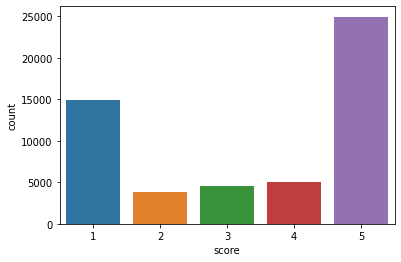

In [ ]:
sns.countplot(x='score', data=df2)

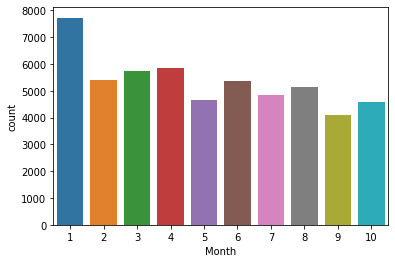

In [ ]:
sns.countplot(x='Month',data=df2)

In [ ]:
df2['value'].value_counts()

positive    30050
negative    23327
Name: value, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (3,4)

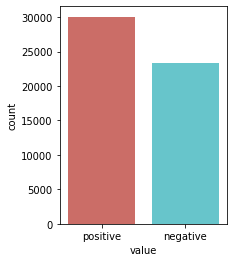

In [ ]:
sns.countplot(x='value', data=df2, palette='hls')

In [ ]:
df2['score'].value_counts()

5    24963
1    14927
4     5087
3     4554
2     3846
Name: score, dtype: int64

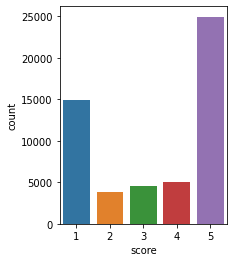

In [ ]:
sns.countplot(x='score',data=df2)

In [ ]:
df2['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
mmap = {1:'Januari', 2:'Februari', 3:'Maret', 4:'April', 5:'Mei', 6:'Juni', 7:'Juli', 8:'Agustus', 9:'September', 10:'Oktober'}

In [ ]:
df2['Bulan'] = df2['Month'].map(mmap) 

In [ ]:
df2['score'].unique()

array([5, 1, 3, 4, 2])

In [ ]:
mmap2 = {1:'Bintang 1', 2:'Bintang 2', 3:'Bintang 3', 4:'Bintang 4', 5:'Bintang 5'}

In [ ]:
df2['Rating'] = df2['score'].map(mmap2)

In [ ]:
df2

,Comment,Month,Year,Month Year,score,value,Bulan,Rating
0,masi lelet jaringannya,1,2021,January-2021,5,positive,Januari,Bintang 5
1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative,Januari,Bintang 1
2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive,Januari,Bintang 5
3,Habis di update gk bisa login,1,2021,January-2021,1,negative,Januari,Bintang 1
4,mantull,1,2021,January-2021,5,positive,Januari,Bintang 5
...,...,...,...,...,...,...,...,...
93499,mantap sangat bagus dan membantu saya dalam be...,10,2021,October-2021,5,positive,Oktober,Bintang 5
93500,aku berharap jaringan lebih stabil dan bisa la...,10,2021,October-2021,5,positive,Oktober,Bintang 5
93501,Aksaranya di perbesar ya ! agar baca zona anti...,10,2021,October-2021,5,positive,Oktober,Bintang 5
93502,mantappp,10,2021,October-2021,5,positive,Oktober,Bintang 5


In [ ]:
table2

Rating,Bintang 1,Bintang 2,Bintang 3,Bintang 4,Bintang 5
Bulan,,,,,
Agustus,1585,383,437,470,2257
April,1664,554,590,511,2538
Februari,1457,344,415,543,2630
Januari,2024,612,744,772,3568
Juli,1165,317,412,506,2457
Juni,1255,361,452,527,2767
Maret,1597,337,472,557,2758
Mei,1321,377,417,435,2110
Oktober,1676,271,301,353,1981


In [ ]:
table3 = df2['Bulan'].value_counts()

In [ ]:
table3

Januari      7720
April        5858
Maret        5721
Februari     5389
Juni         5362
Agustus      5132
Juli         4857
Mei          4660
Oktober      4582
September    4096
Name: Bulan, dtype: int64

In [ ]:
pd.DataFrame(table3)

,Bulan
Januari,7720
April,5858
Maret,5721
Februari,5389
Juni,5362
Agustus,5132
Juli,4857
Mei,4660
Oktober,4582
September,4096


In [ ]:
df2['Rating'].value_counts()

Bintang 5    24963
Bintang 1    14927
Bintang 4     5087
Bintang 3     4554
Bintang 2     3846
Name: Rating, dtype: int64

In [ ]:
Skor = pd.pivot_table(df2, index=['Rating'], values='Comment', aggfunc='count')
Skor

,Comment
Rating,
Bintang 1,14927
Bintang 2,3846
Bintang 3,4554
Bintang 4,5087
Bintang 5,24963


In [ ]:
Skor = df2.groupby('Rating').count()['value']
Skor = pd.DataFrame(Skor)
Skor

,value
Rating,
Bintang 1,14927
Bintang 2,3846
Bintang 3,4554
Bintang 4,5087
Bintang 5,24963


In [ ]:
Skor.to_excel('Bintang.xlsx')

In [ ]:
Skor = pd.read_excel('Bintang.xlsx')
Skor

,Rating,value
0,Bintang 1,14927
1,Bintang 2,3846
2,Bintang 3,4554
3,Bintang 4,5087
4,Bintang 5,24963


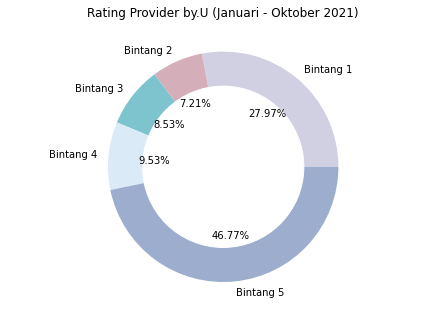

No handles with labels found to put in legend.


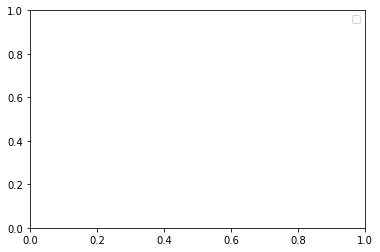

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colors = ('#D1CFE2', '#D4AFB9', '#7EC4CF', '#DAEAF6', '#9CADCE')
ax.pie(Skor['value'],labels=Skor['Rating'],autopct='%1.2f%%', colors=colors)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax.set_title('Rating Provider by.U (Januari - Oktober 2021)')
plt.show()
plt.legend()

In [ ]:
Skorr = df2.groupby('value').count()['Comment'].reset_index()
pd.DataFrame(Skorr)

,value,Comment
0,negative,23327
1,positive,30050


In [ ]:
Skorr.rename(columns={'value':'Kelas', 'Comment':'Jumlah'}, inplace=True)
Skorr

,Kelas,Jumlah
0,negative,23327
1,positive,30050


In [ ]:
Skorr.to_excel('Kelas.xlsx')

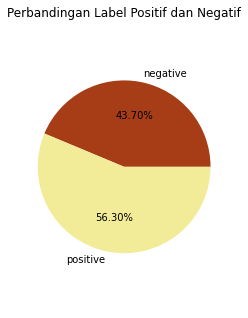

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colors = ('#A63D17', '#F2EC99')
ax.pie(Skorr['Jumlah'],labels=Skorr['Kelas'],autopct='%1.2f%%', colors=colors)
ax.set_title('Perbandingan Label Positif dan Negatif')
plt.show()

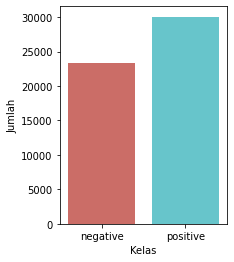

In [ ]:
sns.barplot(x='Kelas', y='Jumlah', data=Skorr, palette='hls')

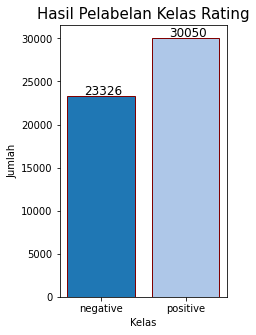

In [ ]:
# Visualizing the data in DataFrame df with values on the bars

plt.figure(figsize=[3, 5])
col_map = plt.get_cmap('tab20')

# Creating a bar chart from the DataFrame df
pl = plt.bar(Skorr.Kelas, Skorr.Jumlah, width=0.8, color=col_map.colors, 
        edgecolor='maroon', linewidth=1)

for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.2, bar.get_height()+100), 
                     fontsize=12)

plt.title('Hasil Pelabelan Kelas Rating', fontsize=15)
plt.xlabel('Kelas', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)
plt.show()

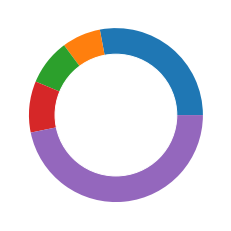

In [ ]:
# library
import matplotlib.pyplot as plt

# create data
size_of_groups=Skor['value']

# Create a pieplot
plt.pie(size_of_groups)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

#DATA ATRIBUT

CTQ : Pada penelitian ini penyebab penilaian negatif yang menjadi cacat adalah pelanggan memberikan bintang 1, bintang 2, atau bintang 3.

In [ ]:
df2

,Unnamed: 0,Unnamed: 0.1,Comment,Month,Year,Month Year,score,value,Bulan,Rating
0,0,0,masi lelet jaringannya,1,2021,January-2021,5,positive,Januari,Bintang 5
1,1,1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative,Januari,Bintang 1
2,2,2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive,Januari,Bintang 5
3,3,3,Habis di update gk bisa login,1,2021,January-2021,1,negative,Januari,Bintang 1
4,4,4,mantull,1,2021,January-2021,5,positive,Januari,Bintang 5
...,...,...,...,...,...,...,...,...,...,...
53372,53372,93499,mantap sangat bagus dan membantu saya dalam be...,10,2021,October-2021,5,positive,Oktober,Bintang 5
53373,53373,93500,aku berharap jaringan lebih stabil dan bisa la...,10,2021,October-2021,5,positive,Oktober,Bintang 5
53374,53374,93501,Aksaranya di perbesar ya ! agar baca zona anti...,10,2021,October-2021,5,positive,Oktober,Bintang 5
53375,53375,93502,mantappp,10,2021,October-2021,5,positive,Oktober,Bintang 5


In [ ]:
del df2['Unnamed: 0']
del df2['Unnamed: 0.1']

In [ ]:
df2

,Comment,Month,Year,Month Year,score,value,Bulan,Rating
0,masi lelet jaringannya,1,2021,January-2021,5,positive,Januari,Bintang 5
1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative,Januari,Bintang 1
2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive,Januari,Bintang 5
3,Habis di update gk bisa login,1,2021,January-2021,1,negative,Januari,Bintang 1
4,mantull,1,2021,January-2021,5,positive,Januari,Bintang 5
...,...,...,...,...,...,...,...,...
93499,mantap sangat bagus dan membantu saya dalam be...,10,2021,October-2021,5,positive,Oktober,Bintang 5
93500,aku berharap jaringan lebih stabil dan bisa la...,10,2021,October-2021,5,positive,Oktober,Bintang 5
93501,Aksaranya di perbesar ya ! agar baca zona anti...,10,2021,October-2021,5,positive,Oktober,Bintang 5
93502,mantappp,10,2021,October-2021,5,positive,Oktober,Bintang 5


In [ ]:
df2['Nominal'] = 1

In [ ]:
df2

,Comment,Month,Year,Month Year,score,value,Bulan,Rating,Nominal
0,masi lelet jaringannya,1,2021,January-2021,5,positive,Januari,Bintang 5,1
1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative,Januari,Bintang 1,1
2,Di tempat saya bagus jaringan nya dan sangat luas,1,2021,January-2021,5,positive,Januari,Bintang 5,1
3,Habis di update gk bisa login,1,2021,January-2021,1,negative,Januari,Bintang 1,1
4,mantull,1,2021,January-2021,5,positive,Januari,Bintang 5,1
...,...,...,...,...,...,...,...,...,...
93499,mantap sangat bagus dan membantu saya dalam be...,10,2021,October-2021,5,positive,Oktober,Bintang 5,1
93500,aku berharap jaringan lebih stabil dan bisa la...,10,2021,October-2021,5,positive,Oktober,Bintang 5,1
93501,Aksaranya di perbesar ya ! agar baca zona anti...,10,2021,October-2021,5,positive,Oktober,Bintang 5,1
93502,mantappp,10,2021,October-2021,5,positive,Oktober,Bintang 5,1


In [ ]:
negatif = df2[df2["Rating"].isin(["Bintang 1", "Bintang 2", "Bintang 3"])]

In [ ]:
negatif

,Comment,Month,Year,Month Year,score,value,Bulan,Rating,Nominal
1,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,1,2021,January-2021,1,negative,Januari,Bintang 1,1
3,Habis di update gk bisa login,1,2021,January-2021,1,negative,Januari,Bintang 1,1
5,paket 15 GB yg 50 ribu kami tunggu,1,2021,January-2021,3,negative,Januari,Bintang 3,1
6,ditunggu paket 15 gb yg 50.000,1,2021,January-2021,3,negative,Januari,Bintang 3,1
7,ok,1,2021,January-2021,1,negative,Januari,Bintang 1,1
...,...,...,...,...,...,...,...,...,...
93487,Tahan kuota nya habis tanggal😍 karena jaringan...,10,2021,October-2021,1,negative,Oktober,Bintang 1,1
93494,Worth it buat kamu yang penyabar 🙂👍,10,2021,October-2021,3,negative,Oktober,Bintang 3,1
93495,By u lemot,10,2021,October-2021,2,negative,Oktober,Bintang 2,1
93496,Selalu bermasalah saat buka apps untuk mengisi...,10,2021,October-2021,1,negative,Oktober,Bintang 1,1


In [ ]:
negatif.to_excel('Nilai Negatif.xlsx')

In [ ]:
negatif = pd.read_excel('Nilai Negatif.xlsx')

In [ ]:
totalnegatif = negatif['Nominal'].sum()

In [ ]:
totalnegatif

23327

In [ ]:
#Karakteristik penilaian negatif
tableneg = pd.pivot_table(negatif,
                          index=['Rating'],
                          values=['Nominal'] ,
                          aggfunc=[np.sum, (lambda x: sum(x)/total*100)], 
                          margins=True,
                          margins_name="Total")

In [ ]:
tableneg

,sum,<lambda>
,Nominal,Nominal
Rating,,
Bintang 1,14927,63.990226
Bintang 2,3846,16.487332
Bintang 3,4554,19.522442
Total,23327,100.000000


In [ ]:
pd.DataFrame(tableneg)

,sum,<lambda>
,Nominal,Nominal
Rating,,
Bintang 1,14927,63.990226
Bintang 2,3846,16.487332
Bintang 3,4554,19.522442
Total,23327,100.000000


In [ ]:
tableneg.to_excel('tableneg.xlsx')

In [ ]:
tableneg = pd.read_excel('tableneg.xlsx')

In [ ]:
tablenegg = tableneg[:-1]

In [ ]:
tablenegg

,Rating,Jumlah,persen
0,Bintang 1,14927.0,63.990226
1,Bintang 2,3846.0,16.487332
2,Bintang 3,4554.0,19.522442


In [ ]:
tablenegg = tablenegg.set_index('Rating')

In [ ]:
tablenegg

,Jumlah,persen
Rating,,
Bintang 1,14927,63.990226
Bintang 2,3846,16.487332
Bintang 3,4554,19.522442


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
tablenegg = tablenegg.sort_values(by='Jumlah',ascending=False)
tablenegg["cumpercentage"] = tablenegg["Jumlah"].cumsum()/tablenegg["Jumlah"].sum()*100

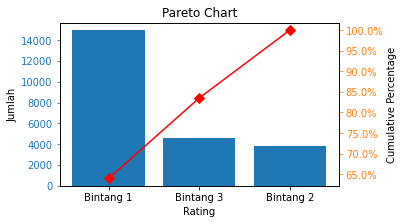

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_title("Pareto Chart")
ax.set_xlabel("Rating")
ax.set_ylabel("Jumlah")
ax.bar(tablenegg.index, tablenegg["Jumlah"], color="C0")

ax2 = ax.twinx()
ax2.plot(tablenegg.index, tablenegg['cumpercentage'], color="red", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

Dari diagram pareto yang didapat CTQ yang paling berpotensial adalah penilaian dengan Bintang 1 yaitu berjumlah 14927

#DPMO DAN LEVEL SIGMA

In [ ]:
Total_data = df2['Nominal'].sum()
Total_data

KeyError: ignored

In [ ]:
totalnegatif

23327

In [ ]:
DPU = totalnegatif/Total_data
DPU

0.4370234370609064

In [ ]:
DPO = totalnegatif/(3*Total_data)
DPO

0.14567447902030212

In [ ]:
DPMO = DPO*1000000
DPMO

145674.47902030213

Tabel konversi nilai sigma berdasarkan konsep Motorolla

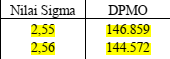

dicari nilai sigma diantara nilai dpmo 146.859 dan 144.572

In [ ]:
S1 = 2.55
S2 = 2.56
DPMO1 = 146859
DPMO2 = 144572

In [ ]:
R1 = DPMO1 - DPMO
R1

1184.5209796978743

In [ ]:
R2 = DPMO1 - DPMO2
R2

2287

In [ ]:
Nilai_sigma = S2 - ((R1/R2)*(S2 - S1))
Nilai_sigma

2.5548206341071364

berdasarkan tabel konversi six sigma, untuk nilai DPMO sebesar 145.674,4790 nilai sigmanya adalah 2,55482

#SENTIMENT ANALYSIS

In [ ]:
pip install 'Sastrawi'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 14.4 MB/s 


In [ ]:
#Import library
import re
import string

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

##Cleansing and Preprocessing data

In [ ]:
#dt adalah dataframe yang digunakan membuat model analisis sentimen
datanegatif = negatif[['Comment']]

In [ ]:
datanegatif.head()

,Comment
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...
1,Habis di update gk bisa login
2,paket 15 GB yg 50 ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000
4,ok


In [ ]:
datanegatif

,Comment
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...
1,Habis di update gk bisa login
2,paket 15 GB yg 50 ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000
4,ok
...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...
23323,Worth it buat kamu yang penyabar 🙂👍
23324,By u lemot
23325,Selalu bermasalah saat buka apps untuk mengisi...


In [ ]:
datanegatif = datanegatif.applymap(str)

Untuk lebih mudahnya, kita dapat mendefinisikan fungsi untuk membersihkan data

###**CASE FOLDING**

In [ ]:
#Casefolding
lowerlist = []
for index, row in datanegatif.iterrows():
  lowerlist.append(row['Comment'].lower())
datanegatif['Lower']=lowerlist

In [ ]:
datanegatif

,Comment,Lower
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maks 1.5mbps. nya...
1,Habis di update gk bisa login,habis di update gk bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yg 50 ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yg 50.000
4,ok,ok
...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...
23323,Worth it buat kamu yang penyabar 🙂👍,worth it buat kamu yang penyabar 🙂👍
23324,By u lemot,by u lemot
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka apps untuk mengisi...


In [ ]:
datanegatif.to_excel('lowercase.xlsx')

In [ ]:
datanegatif = pd.read_excel('lowercase.xlsx')

###Menggabungkan byu 1

In [ ]:
datanegatif['Lower']=datanegatif.apply(lambda x: x['Lower'].replace("by u", "byu"),axis=1)

In [ ]:
datanegatif

,Comment,Lower
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maks 1.5mbps. nya...
1,Habis di update gk bisa login,habis di update gk bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yg 50 ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yg 50.000
4,ok,ok
...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...
23323,Worth it buat kamu yang penyabar 🙂👍,worth it buat kamu yang penyabar 🙂👍
23324,By u lemot,byu lemot
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka apps untuk mengisi...


###NORMALISASI KATA 1

In [ ]:
datakamus = pd.read_excel('slangword.xlsx')

In [ ]:
kamus=datakamus.set_index('index').to_dict()['word']

In [ ]:
def normalisasi(dataframe,namakolom,namakolombaru):
  def scanner(sentence):
      words = sentence.lower().split()
      kalimat = []
      for word in words:
        try:
          kalimat.append(str(kamus[word]))
        except:
          kalimat.append(str(word))
      return ' '.join(kalimat)
  dataframe[namakolombaru]=dataframe.apply(lambda x: scanner(str(x[namakolom])),axis=1)
  return(dataframe)

In [ ]:
normalisasi(datanegatif,'Lower','Lower')

,Comment,Lower
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....
1,Habis di update gk bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000
4,ok,oke
...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍
23324,By u lemot,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('lowercase.xlsx')

###**REMOVE NUMBER**

In [ ]:
#Remove Number
def removenumber(data):
  data = re.sub(r'\d+','', data)
  return data

In [ ]:
removenum = []
for index, row in datanegatif.iterrows():
  removenum.append(removenumber(row["Lower"]))
datanegatif['Removenum']=removenum

In [ ]:
datanegatif

,Comment,Lower,Removenum
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .
4,ok,oke,oke
...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍
23324,By u lemot,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('removenumber.xlsx')

In [ ]:
datanegatif = pd.read_excel('removenumber.xlsx')

###**REMOVE PUNCTUATION**

In [ ]:
#Remove Punctuation
def punctuation(data):
  data = re.sub(r"[,.;@#?!&$]+\ *", " ", data)
  data = data.translate(str.maketrans('','', string.punctuation))
  return data

In [ ]:
removepunc = []
for index, row in datanegatif.iterrows():
  removepunc.append(punctuation(row["Removenum"]))
datanegatif['Removepunc']=removepunc

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang
4,ok,oke,oke,oke
...,...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍
23324,By u lemot,byu lama,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('removepunctuation.xlsx')

In [ ]:
datanegatif = pd.read_excel('removepunctuation.xlsx')

###**REMOVE NON ASCII CHARACTER**

In [ ]:
#Remove non ASCII chars
def asciiunicode(data):
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)
  data = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', data)
  data = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", data)
  data = re.sub(r'\\u\w\w\w\w', '', data)
  return data

In [ ]:
removeau = []
for index, row in datanegatif.iterrows():
  removeau.append(asciiunicode(row["Removepunc"]))
datanegatif['Removeasciiunicode']=removeau

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang
4,ok,oke,oke,oke,oke
...,...,...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar
23324,By u lemot,byu lama,byu lama,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('removeasciiunicode.xlsx')

In [ ]:
datanegatif = pd.read_excel('removeasciiunicode.xlsx', index_col=0)

In [ ]:
datanegatif = datanegatif.applymap(str)

###Menggabungkan byu

In [ ]:
datanegatif['byu']=datanegatif.apply(lambda x: x['Removeasciiunicode'].replace("by u", "byu"),axis=1)

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang
4,ok,oke,oke,oke,oke,oke
...,...,...,...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar
23324,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('byugabung.xlsx')

In [ ]:
datanegatif = pd.read_excel('byugabung.xlsx')

###NORMALISASI KATA

In [ ]:
datakamus = pd.read_excel('slangword.xlsx')

In [ ]:
kamus=datakamus.set_index('index').to_dict()['word']

In [ ]:
def normalisasi(dataframe,namakolom,namakolombaru):
  def scanner(sentence):
      words = sentence.lower().split()
      kalimat = []
      for word in words:
        try:
          kalimat.append(str(kamus[word]))
        except:
          kalimat.append(str(word))
      return ' '.join(kalimat)
  dataframe[namakolombaru]=dataframe.apply(lambda x: scanner(str(x[namakolom])),axis=1)
  return(dataframe)

In [ ]:
normalisasi(datanegatif,'byu','Normalisasi')

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang
4,ok,oke,oke,oke,oke,oke,oke
...,...,...,...,...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar
23324,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif

In [ ]:
datanegatif.to_excel('Normalisasi.xlsx')

In [ ]:
datanegatif = pd.read_excel('Normalisasi.xlsx')

###MENGHAPUS SPASI GANDA

In [ ]:
#Remove multiple whitespace into single whitespace
def removewhitespace(data):
  data = re.sub('\s+', ' ', data)
  return data

In [ ]:
removews = []
for index, row in datanegatif.iterrows():
  removews.append(removewhitespace(row["Normalisasi"]))
datanegatif['Singlews']=removews

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang
4,ok,oke,oke,oke,oke,oke,oke,oke
...,...,...,...,...,...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar
23324,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('removews.xlsx')

In [ ]:
datanegatif = pd.read_excel('removews.xlsx', index_col=0)

###MENGHAPUS KARAKTER SENDIRI

In [ ]:
#Remove single character
def removesc (data):
  data = re.sub(r"\b[a-zA-Z]\b", "", data)
  return data

In [ ]:
removeschar = []
for index, row in datanegatif.iterrows():
  removeschar.append(removesc(row["Singlews"]))
datanegatif['Removesc']=removeschar

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang
4,ok,oke,oke,oke,oke,oke,oke,oke,oke
...,...,...,...,...,...,...,...,...,...
23322,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...
23323,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar
23324,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama
23325,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('Removesc.xlsx')

In [ ]:
datanegatif = pd.read_excel('Removesc.xlsx', index_col=0)

###Pada preprocessing data dapat terjadi kekosongan atau data yang hilang

In [ ]:
#ganti data yang hilang menjadi nan
datanegatif = datanegatif.replace('',np.nan, regex=True)

In [ ]:
#drop the missing value data
datanegatif.dropna(inplace=True)

datanegatif = datanegatif.reset_index()
datanegatif.drop(columns='index', inplace=True)

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang
4,ok,oke,oke,oke,oke,oke,oke,oke,oke
...,...,...,...,...,...,...,...,...,...
23266,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...
23267,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar
23268,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama
23269,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...


In [ ]:
datanegatif.to_excel('data preprocessing.xlsx')

In [ ]:
datanegatif = pd.read_excel('data preprocessing.xlsx', index_col=0)

###**TOKENIZING**

In [ ]:
#----------Tokenizing----------

In [ ]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize 

In [ ]:
def tokenize(data):
    data = nltk.tokenize.word_tokenize(data)
    return data

In [ ]:
#Apply Tokenizing
tokenasi = []
for index, row in datanegatif.iterrows():
  tokenasi.append(tokenize(row['Removesc']))
datanegatif['Tokenizing'] = tokenasi

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,"[unlimited, hari, kecepatan, maksimal, mbps, n..."
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,"[habis, di, update, tidak, bisa, login]"
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,"[paket, gb, yang, ribu, kami, tunggu]"
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,"[ditunggu, paket, gb, yang]"
4,ok,oke,oke,oke,oke,oke,oke,oke,oke,[oke]
...,...,...,...,...,...,...,...,...,...,...
23266,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,"[tahan, kuota, nya, habis, tanggal, karena, ja..."
23267,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,"[worth, itu, buat, kamu, yang, penyabar]"
23268,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,"[byu, lama]"
23269,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,"[selalu, bermasalah, saat, buka, aplikasi, unt..."


In [ ]:
datanegatif.to_excel('Tokenasi.xlsx')

In [ ]:
datanegatif = pd.read_excel('Tokenasi.xlsx', index_col=0)

###**STOPWORD REMOVER**

In [ ]:
#----------Stopword----------

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
list_stopwords.extend(['nya'])

In [ ]:
txt_stopword = pd.read_csv("indonesia-stopwords.txt", names= ["stopwords"], header = None)

In [ ]:
list_stopwords.extend(txt_stopword['stopwords'])

In [ ]:
list_stopwords = set(list_stopwords)

In [ ]:
list_stopwords

{'semestinya',
 'andalah',
 'terus-menerus',
 'ton',
 'bisakah',
 'sertamerta',
 'mungkin-mungkin',
 'mengapa',
 'tahu',
 'semua',
 'selesainya',
 'bermulabersama',
 'ayo',
 'berawal',
 'lain',
 'sebanyak',
 'kira-kira',
 'sekadarnya',
 'sana-sana',
 'j',
 'malahan',
 'emang',
 'www',
 'akurat',
 'dini',
 'memilih',
 'berikan',
 'x',
 'teringat-ingat',
 'terdapat',
 'sebisanya',
 'jelas',
 'mata',
 'betul',
 'kenapa',
 'benarkah',
 'bolehnya',
 'sering-seringnya',
 'bakal',
 'dimulailah',
 'sesuainya',
 'rpempat',
 'kamilah',
 'pertanyaan',
 'sepantarnya',
 'diingatkan',
 'mengibaratkan',
 'seterusnya',
 'cok',
 'sendirian',
 'dijelaskan',
 'sementara',
 'belakang',
 'sebenarnya',
 'ga',
 'cuitannya',
 'agaknya',
 'antara',
 'nih',
 'tetaplah',
 'menunjukan',
 'jauh',
 'balikkan',
 'kok',
 'belumlah',
 'ke',
 'v',
 'diakhirinya',
 'empat',
 'tiap',
 'memisalkan',
 'cukuuppp',
 'segala',
 'apakah',
 'paling-paling',
 'agak-agak',
 'seseorang',
 'sekecil',
 'setempat',
 'oleh',
 'sangkut

In [ ]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
datanegatif['Stopremover'] = datanegatif['Tokenizing'].apply(stopwords_removal)

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
#Terapkan stopword remover
stopremove = []
for index, row in datanegatif.iterrows():
  stopremove.append(stopword.remove(row['Stopremover'].split('')))
datanegatif['Stopremover'] = stopremove

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,"[unlimited, hari, kecepatan, maksimal, mbps, n...","[unlimited, kecepatan, maksimal, mbps, kb, kbps]"
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,"[habis, di, update, tidak, bisa, login]","[habis, update, login]"
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,"[paket, gb, yang, ribu, kami, tunggu]","[paket, gb, tunggu]"
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,"[ditunggu, paket, gb, yang]","[ditunggu, paket, gb]"
4,ok,oke,oke,oke,oke,oke,oke,oke,oke,[oke],[]
...,...,...,...,...,...,...,...,...,...,...,...
23266,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,"[tahan, kuota, nya, habis, tanggal, karena, ja...","[tahan, kuota, habis, tanggal, jaringan, menon..."
23267,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,"[worth, itu, buat, kamu, yang, penyabar]","[worth, penyabar]"
23268,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,"[byu, lama]",[byu]
23269,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,"[selalu, bermasalah, saat, buka, aplikasi, unt...","[bermasalah, buka, aplikasi, mengisi, paket, i..."


In [ ]:
datanegatif.to_excel("stopwordremov.xlsx")

In [ ]:
datanegatif = pd.read_excel('stopwordremov.xlsx')

In [ ]:
datanegatif = datanegatif.applymap(str)

###**STEMMING**

In [ ]:
#----------STEMMING----------

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
pip install swifter

In [ ]:
import swifter

In [ ]:
stemfactory = StemmerFactory()
stemmer = stemfactory.create_stemmer()

In [ ]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in datanegatif['Stopremover']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


In [ ]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

In [ ]:
datanegatif['Stemmer'] = datanegatif['Stopremover'].swifter.apply(get_stemmed_term)
print(datanegatif['Stemmer'])

In [ ]:
#Terapkan stemmer
stem = []
for index, row in datanegatif.iterrows():
  stem.append(stemmer.stem(row['Stopremover']))
datanegatif['Stemmer'] = stem

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover,Stemmer
0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,"[unlimited, hari, kecepatan, maksimal, mbps, n...","[unlimited, kecepatan, maksimal, mbps, kb, kbps]","[unlimited, cepat, maksimal, mbps, kb, kbps]"
1,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,"[habis, di, update, tidak, bisa, login]","[habis, update, login]","[habis, update, login]"
2,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,"[paket, gb, yang, ribu, kami, tunggu]","[paket, gb, tunggu]","[paket, gb, tunggu]"
3,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,"[ditunggu, paket, gb, yang]","[ditunggu, paket, gb]","[tunggu, paket, gb]"
4,ok,oke,oke,oke,oke,oke,oke,oke,oke,[oke],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
23266,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,"[tahan, kuota, nya, habis, tanggal, karena, ja...","[tahan, kuota, habis, tanggal, jaringan, menon...","[tahan, kuota, habis, tanggal, jaring, tonton,..."
23267,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,"[worth, itu, buat, kamu, yang, penyabar]","[worth, penyabar]","[worth, sabar]"
23268,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,"[byu, lama]",[byu],[byu]
23269,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,"[selalu, bermasalah, saat, buka, aplikasi, unt...","[bermasalah, buka, aplikasi, mengisi, paket, i...","[masalah, buka, aplikasi, isi, paket, internet]"


In [ ]:
datanegatif.to_excel('stemmer.xlsx')

In [ ]:
datanegatif = pd.read_excel('stemmer.xlsx', index_col=0)

In [ ]:
datanegatif = datanegatif.applymap(str)

###**REMOVE PUNCTUATION**

In [ ]:
#Remove Punctuation
def punctuation(data):
  data = re.sub(r"[,.;@#?!&$]+\ *", " ", data)
  data = data.translate(str.maketrans('','', string.punctuation))
  return data

In [ ]:
removepunc = []
for index, row in datanegatif.iterrows():
  removepunc.append(punctuation(row["Stemmer"]))
datanegatif['Stemmer']=removepunc

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover,Stemmer
0.0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,"['unlimited', 'hari', 'kecepatan', 'maksimal',...","['unlimited', 'kecepatan', 'maksimal', 'mbps',...",unlimited cepat maksimal mbps kb kbps
1.0,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,"['habis', 'di', 'update', 'tidak', 'bisa', 'lo...","['habis', 'update', 'login']",habis update login
2.0,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,"['paket', 'gb', 'yang', 'ribu', 'kami', 'tunggu']","['paket', 'gb', 'tunggu']",paket gb tunggu
3.0,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,"['ditunggu', 'paket', 'gb', 'yang']","['ditunggu', 'paket', 'gb']",tunggu paket gb
4.0,ok,oke,oke,oke,oke,oke,oke,oke,oke,['oke'],[],
...,...,...,...,...,...,...,...,...,...,...,...,...
23266.0,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,"['tahan', 'kuota', 'nya', 'habis', 'tanggal', ...","['tahan', 'kuota', 'habis', 'tanggal', 'jaring...",tahan kuota habis tanggal jaring tonton tik to...
23267.0,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,"['worth', 'itu', 'buat', 'kamu', 'yang', 'peny...","['worth', 'penyabar']",worth sabar
23268.0,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,"['byu', 'lama']",['byu'],byu
23269.0,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,"['selalu', 'bermasalah', 'saat', 'buka', 'apli...","['bermasalah', 'buka', 'aplikasi', 'mengisi', ...",masalah buka aplikasi isi paket internet


In [ ]:
datanegatif.to_excel('removepunctuation.xlsx')

In [ ]:
datanegatif = pd.read_excel('removepunctuation.xlsx')

###**TOKENIZING**

In [ ]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize 

In [ ]:
def tokenize(data):
    data = nltk.tokenize.word_tokenize(data)
    return data

In [ ]:
tokenasi = []
for index, row in datanegatif.iterrows():
  tokenasi.append(tokenize(row['Stemmer']))
datanegatif['Stemmer'] = tokenasi

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover,Stemmer
0.0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,"['unlimited', 'hari', 'kecepatan', 'maksimal',...","['unlimited', 'kecepatan', 'maksimal', 'mbps',...","[unlimited, cepat, maksimal, mbps, kb, kbps]"
1.0,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,"['habis', 'di', 'update', 'tidak', 'bisa', 'lo...","['habis', 'update', 'login']","[habis, update, login]"
2.0,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,"['paket', 'gb', 'yang', 'ribu', 'kami', 'tunggu']","['paket', 'gb', 'tunggu']","[paket, gb, tunggu]"
3.0,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,"['ditunggu', 'paket', 'gb', 'yang']","['ditunggu', 'paket', 'gb']","[tunggu, paket, gb]"
4.0,ok,oke,oke,oke,oke,oke,oke,oke,oke,['oke'],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
23266.0,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,"['tahan', 'kuota', 'nya', 'habis', 'tanggal', ...","['tahan', 'kuota', 'habis', 'tanggal', 'jaring...","[tahan, kuota, habis, tanggal, jaring, tonton,..."
23267.0,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,"['worth', 'itu', 'buat', 'kamu', 'yang', 'peny...","['worth', 'penyabar']","[worth, sabar]"
23268.0,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,"['byu', 'lama']",['byu'],[byu]
23269.0,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,"['selalu', 'bermasalah', 'saat', 'buka', 'apli...","['bermasalah', 'buka', 'aplikasi', 'mengisi', ...","[masalah, buka, aplikasi, isi, paket, internet]"


In [ ]:
datanegatif.to_excel('Tokenasi.xlsx')

In [ ]:
datanegatif = pd.read_excel('Tokenasi.xlsx', index_col=0)

#SENTIMENT ANALYSIS FULL

In [ ]:
pip install 'Sastrawi'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.2 MB/s 


In [ ]:
#Import library
import re
import string

In [ ]:
import nltk
nltk.download('all')

##Cleansing and Preprocessing data

In [ ]:
Data = pd.read_excel('datadata.xlsx')

In [ ]:
Data.head()

,Unnamed: 0,at,content,score
0,1279,2021-10-31 23:57:40,"udah lama pakai by u, kalo buka aplikasi serin...",1
1,1280,2021-10-31 23:55:36,Saya mau bayar pakai shopee tapi mantainace ny...,5
2,1281,2021-10-31 23:52:18,"Mantul lah, udah pake beberapa bulan mantap",5
3,1282,2021-10-31 23:41:59,harga agar lebih bersahabat lagi,5
4,1283,2021-10-31 23:27:31,"Segini dulu ya, mantap",4


In [ ]:
#dt adalah dataframe yang digunakan membuat model analisis sentimen
datareview = Data[['content']]

In [ ]:
datareview.head()

,content
0,"udah lama pakai by u, kalo buka aplikasi serin..."
1,Saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap"
3,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap"


In [ ]:
datareview = datareview.applymap(str)

Untuk lebih mudahnya, kita dapat mendefinisikan fungsi untuk membersihkan data

###**CASE FOLDING**

In [ ]:
#Casefolding
lowerlist = []
for index, row in datareview.iterrows():
  lowerlist.append(row['content'].lower())
datareview['Lower']=lowerlist

In [ ]:
datareview

,content,Lower
0,"udah lama pakai by u, kalo buka aplikasi serin...","udah lama pakai by u, kalo buka aplikasi serin..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, udah pake beberapa bulan mantap"
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, mantap"
...,...,...
53372,mantap,mantap
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! gak ribet, transparan, pilih semaumu p..."
53374,Ok,ok
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...


In [ ]:
datareview.to_excel('lowercase.xlsx')

In [ ]:
datanegatif = pd.read_excel('lowercase.xlsx')

###Menggabungkan byu 1

In [ ]:
datareview['Lower']=datareview.apply(lambda x: x['Lower'].replace("by u", "byu"),axis=1)

In [ ]:
datareview

,content,Lower
0,"udah lama pakai by u, kalo buka aplikasi serin...","udah lama pakai byu, kalo buka aplikasi sering..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, udah pake beberapa bulan mantap"
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, mantap"
...,...,...
53372,mantap,mantap
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! gak ribet, transparan, pilih semaumu p..."
53374,Ok,ok
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...


###NORMALISASI KATA 1

In [ ]:
datakamus = pd.read_excel('slangword.xlsx')

In [ ]:
kamus=datakamus.set_index('index').to_dict()['word']

In [ ]:
def normalisasi(dataframe,namakolom,namakolombaru):
  def scanner(sentence):
      words = sentence.lower().split()
      kalimat = []
      for word in words:
        try:
          kalimat.append(str(kamus[word]))
        except:
          kalimat.append(str(word))
      return ' '.join(kalimat)
  dataframe[namakolombaru]=dataframe.apply(lambda x: scanner(str(x[namakolom])),axis=1)
  return(dataframe)

In [ ]:
normalisasi(datareview,'Lower','Lower')

,content,Lower
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus"
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus"
...,...,...
53372,mantap,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu..."
53374,Ok,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...


In [ ]:
datareview.to_excel('lowercase.xlsx')

###**REMOVE NUMBER**

In [ ]:
#Remove Number
def removenumber(data):
  data = re.sub(r'\d+','', data)
  return data

In [ ]:
removenum = []
for index, row in datareview.iterrows():
  removenum.append(removenumber(row["Lower"]))
datareview['Removenum']=removenum

In [ ]:
datareview

,content,Lower,Removenum
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus"
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus"
...,...,...,...
53372,mantap,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu..."
53374,Ok,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...


In [ ]:
datareview.to_excel('removenumber.xlsx')

In [ ]:
datanegatif = pd.read_excel('removenumber.xlsx')

###**REMOVE PUNCTUATION**

In [ ]:
#Remove Punctuation
def punctuation(data):
  data = re.sub(r"[,.;@#?!&$]+\ *", " ", data)
  data = data.translate(str.maketrans('','', string.punctuation))
  return data

In [ ]:
removepunc = []
for index, row in datareview.iterrows():
  removepunc.append(punctuation(row["Removenum"]))
datareview['Removepunc']=removepunc

In [ ]:
datareview

,content,Lower,Removenum,Removepunc
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus
...,...,...,...,...
53372,mantap,bagus,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...
53374,Ok,oke,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...


In [ ]:
datareview.to_excel('removepunctuation.xlsx')

In [ ]:
datanegatif = pd.read_excel('removepunctuation.xlsx')

###**REMOVE NON ASCII CHARACTER**

In [ ]:
#Remove non ASCII chars
def asciiunicode(data):
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)
  data = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', data)
  data = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", data)
  data = re.sub(r'\\u\w\w\w\w', '', data)
  return data

In [ ]:
removeau = []
for index, row in datareview.iterrows():
  removeau.append(asciiunicode(row["Removepunc"]))
datareview['Removeasciiunicode']=removeau

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus
...,...,...,...,...,...
53372,mantap,bagus,bagus,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...
53374,Ok,oke,oke,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren


In [ ]:
datareview.to_excel('removeasciiunicode.xlsx')

In [ ]:
datanegatif = pd.read_excel('removeasciiunicode.xlsx', index_col=0)

In [ ]:
datanegatif = datanegatif.applymap(str)

###Menggabungkan byu

In [ ]:
datareview['byu']=datareview.apply(lambda x: x['Removeasciiunicode'].replace("by u", "byu"),axis=1)

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus
...,...,...,...,...,...,...
53372,mantap,bagus,bagus,bagus,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...
53374,Ok,oke,oke,oke,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren


In [ ]:
datareview.to_excel('byugabung.xlsx')

In [ ]:
datanegatif = pd.read_excel('byugabung.xlsx')

###NORMALISASI KATA

In [ ]:
datakamus = pd.read_excel('slangword.xlsx')

In [ ]:
kamus=datakamus.set_index('index').to_dict()['word']

In [ ]:
def normalisasi(dataframe,namakolom,namakolombaru):
  def scanner(sentence):
      words = sentence.lower().split()
      kalimat = []
      for word in words:
        try:
          kalimat.append(str(kamus[word]))
        except:
          kalimat.append(str(word))
      return ' '.join(kalimat)
  dataframe[namakolombaru]=dataframe.apply(lambda x: scanner(str(x[namakolom])),axis=1)
  return(dataframe)

In [ ]:
normalisasi(datareview,'byu','Normalisasi')

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus
...,...,...,...,...,...,...,...
53372,mantap,bagus,bagus,bagus,bagus,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...
53374,Ok,oke,oke,oke,oke,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...


In [ ]:
datanegatif

In [ ]:
datareview.to_excel('Normalisasi.xlsx')

In [ ]:
datanegatif = pd.read_excel('Normalisasi.xlsx')

###MENGHAPUS SPASI GANDA

In [ ]:
#Remove multiple whitespace into single whitespace
def removewhitespace(data):
  data = re.sub('\s+', ' ', data)
  return data

In [ ]:
removews = []
for index, row in datareview.iterrows():
  removews.append(removewhitespace(row["Normalisasi"]))
datareview['Singlews']=removews

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus
...,...,...,...,...,...,...,...,...
53372,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...
53374,Ok,oke,oke,oke,oke,oke,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...


In [ ]:
datareview.to_excel('removews.xlsx')

In [ ]:
datanegatif = pd.read_excel('removews.xlsx', index_col=0)

###MENGHAPUS KARAKTER SENDIRI

In [ ]:
#Remove single character
def removesc (data):
  data = re.sub(r"\b[a-zA-Z]\b", "", data)
  return data

In [ ]:
removeschar = []
for index, row in datareview.iterrows():
  removeschar.append(removesc(row["Singlews"]))
datareview['Removesc']=removeschar

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus
...,...,...,...,...,...,...,...,...,...
53372,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus,bagus
53373,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...
53374,Ok,oke,oke,oke,oke,oke,oke,oke,oke
53375,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...


In [ ]:
datareview.to_excel('Removesc.xlsx')

In [ ]:
datanegatif = pd.read_excel('Removesc.xlsx', index_col=0)

###Pada preprocessing data dapat terjadi kekosongan atau data yang hilang

In [ ]:
#ganti data yang hilang menjadi nan
datareview = datareview.replace('',np.nan, regex=True)

In [ ]:
#drop the missing value data
datareview.dropna(inplace=True)

datareview = datareview.reset_index()
datareview.drop(columns='index', inplace=True)

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus
...,...,...,...,...,...,...,...,...,...
52767,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus,bagus
52768,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...
52769,Ok,oke,oke,oke,oke,oke,oke,oke,oke
52770,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...


In [ ]:
datareview.to_excel('data preprocessing.xlsx')

In [ ]:
datanegatif = pd.read_excel('data preprocessing.xlsx', index_col=0)

###**TOKENIZING**

In [ ]:
#----------Tokenizing----------

In [ ]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize 

In [ ]:
def tokenize(data):
    data = nltk.tokenize.word_tokenize(data)
    return data

In [ ]:
#Apply Tokenizing
tokenasi = []
for index, row in datareview.iterrows():
  tokenasi.append(tokenize(row['Removesc']))
datareview['Tokenizing'] = tokenasi

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,"[sudah, lama, pakai, byu, kalo, buka, aplikasi..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,"[saya, mau, bayar, pakai, shopee, tapi, mantai..."
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,"[mantul, lah, sudah, pakai, beberapa, bulan, b..."
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,"[harga, agar, lebih, bersahabat, lagi]"
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,"[segini, dulu, ya, bagus]"
...,...,...,...,...,...,...,...,...,...,...
52767,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus,bagus,[bagus]
52768,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,"[bagus, tidak, ribet, transparan, pilih, semau..."
52769,Ok,oke,oke,oke,oke,oke,oke,oke,oke,[oke]
52770,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,"[murah, banget, ini, mah, pilihan, anak, kos, ..."


In [ ]:
datareview.to_excel('Tokenasi.xlsx')

In [ ]:
datanegatif = pd.read_excel('Tokenasi.xlsx', index_col=0)

###**STOPWORD REMOVER**

In [ ]:
#----------Stopword----------

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
list_stopwords.extend(['nya'])

In [ ]:
txt_stopword = pd.read_csv("indonesia-stopwords.txt", names= ["stopwords"], header = None)

In [ ]:
list_stopwords.extend(txt_stopword['stopwords'])

In [ ]:
list_stopwords = set(list_stopwords)

In [ ]:
list_stopwords

{'ketimbang',
 'ucap',
 'kinilah',
 'dimaksud',
 'nyatanya',
 'bahwasanya',
 'sehari-harinya',
 'amat-amat',
 'mampu',
 'perlu',
 'insyaallah',
 'keinginan',
 'dini',
 'janganlah',
 'satuanya',
 'ha',
 'anda-anda',
 'pula',
 'masa',
 'dijelaskannya',
 'c',
 'ambe',
 'telaah',
 'karena',
 'berkehendak',
 'deg',
 'kau',
 'sebaliknya',
 'segalanya',
 'menanya',
 'keseluruhannya',
 'kira',
 'supaya',
 'yakni',
 'diberikannya',
 'segitu-gitu',
 'lagi',
 'sehalu',
 'ungkapnya',
 'kemudian',
 'kalaulah',
 'rpsembilan',
 'berturut',
 'diminta',
 'rupa-rupanya',
 'lanjutnya',
 'andalah',
 'santailah',
 'pada',
 'khususnya',
 'dahulu',
 'kepadanya',
 'berikutnya',
 'sedangnya',
 'amatlah',
 'bermula',
 'dijawab',
 'netralitas',
 'doang',
 'tentu',
 'nanya',
 'dekat',
 'dituturkan',
 'sela',
 'mendapat',
 'sebelahnya',
 'sendirinya',
 'sejenak-sejenak',
 'bagian',
 'hal',
 'sekitar',
 'ala',
 'sedangpun',
 'bahasakan',
 'antar',
 'hai',
 'rptiga',
 'situ-situ',
 'biasa',
 'tutur',
 'berlainan',
 

In [ ]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
datareview['Stopremover'] = datareview['Tokenizing'].apply(stopwords_removal)

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
#Terapkan stopword remover
stopremove = []
for index, row in datareview.iterrows():
  stopremove.append(stopword.remove(row['Stopremover'].split('')))
datareview['Stopremover'] = stopremove

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,"[sudah, lama, pakai, byu, kalo, buka, aplikasi...","[pakai, byu, buka, aplikasi, kebuka, suruh, te..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,"[saya, mau, bayar, pakai, shopee, tapi, mantai...","[bayar, pakai, shopee, mantainace]"
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,"[mantul, lah, sudah, pakai, beberapa, bulan, b...","[mantul, pakai, bagus]"
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,"[harga, agar, lebih, bersahabat, lagi]","[harga, bersahabat]"
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,"[segini, dulu, ya, bagus]","[segini, bagus]"
...,...,...,...,...,...,...,...,...,...,...,...
52767,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus,bagus,[bagus],[bagus]
52768,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,"[bagus, tidak, ribet, transparan, pilih, semau...","[bagus, ribet, transparan, pilih, semaumu, pakai]"
52769,Ok,oke,oke,oke,oke,oke,oke,oke,oke,[oke],[]
52770,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,"[murah, banget, ini, mah, pilihan, anak, kos, ...","[murah, pilihan, anak, kos, keren]"


In [ ]:
datareview.to_excel("stopwordremov.xlsx")

In [ ]:
datanegatif = pd.read_excel('stopwordremov.xlsx')

In [ ]:
datanegatif = datanegatif.applymap(str)

###**STEMMING**

In [ ]:
#----------STEMMING----------

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 3.9 MB/s 
     |████████████████████████████████| 281 kB 40.4 MB/s 
     |████████████████████████████████| 1.6 MB 32.4 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=05bdfc4f50c06aff2ba64bc577281c12cd6b4749301ee6d90394effc90eac445
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import swifter

In [ ]:
stemfactory = StemmerFactory()
stemmer = stemfactory.create_stemmer()

In [ ]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in datareview['Stopremover']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


Streaming output truncated to the last 5000 lines.
tbh : tbh
jah : jah
kesayanganku : sayang
semanagt : semanagt
samimawon : samimawon
diplosok : diplosok
krj : krj
rapiin : rapiin
plissss : plissss
betterrrrrrrrrrr : betterrrrrrrrrrr
inima : inima
sukamulya : sukamulya
yaaaakkk : yaaaakkk
lngkap : lngkap
refreshing : refreshing
hhahahaha : hhahahaha
nyan : nyan
helas : has
sedetik : detik
konntoooooooooo : konntoooooooooo
uinstall : uinstall
capeek : capeek
gunq : gunq
gamti : gamti
ekh : ekh
masihh : masihh
sidoharjo : sidoharjo
malemnya : malemnya
ditmpt : ditmpt
ngarepin : ngarepin
petunjukbantuan : petunjukbantuan
nyal : nyal
riseller : riseller
pecahkan : pecah
baguuss : baguuss
makrunyus : makrunyus
mantape : mantape
sexali : sexali
recomeng : recomeng
awlnya : awlnya
jariangann : jariangann
digoa : digoa
ngelk : ngelk
blesss : blesss
kritinggg : kritinggg
solusinaaa : solusinaaa
uwauw : uwauw
penggunalama : penggunalama
memudahkanku : mudah
memanajemen : manajemen
wowo : wowo
g

In [ ]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

In [ ]:
datareview['Stemmer'] = datareview['Stopremover'].swifter.apply(get_stemmed_term)
print(datareview['Stemmer'])

Pandas Apply:   0%|          | 0/52772 [00:00<?, ?it/s]

0        [pakai, byu, buka, aplikasi, buka, suruh, tena...
1                       [bayar, pakai, shopee, mantainace]
2                                   [mantul, pakai, bagus]
3                                         [harga, sahabat]
4                                             [gin, bagus]
                               ...                        
52767                                              [bagus]
52768        [bagus, ribet, transparan, pilih, mau, pakai]
52769                                                   []
52770                     [murah, pilih, anak, kos, keren]
52771    [byu, jaring, byu, jelek, jaring, rusak, mulu,...
Name: Stemmer, Length: 52772, dtype: object


In [ ]:
#Terapkan stemmer
stem = []
for index, row in datanegatif.iterrows():
  stem.append(stemmer.stem(row['Stopremover']))
datanegatif['Stemmer'] = stem

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover,Stemmer
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,"[sudah, lama, pakai, byu, kalo, buka, aplikasi...","[pakai, byu, buka, aplikasi, kebuka, suruh, te...","[pakai, byu, buka, aplikasi, buka, suruh, tena..."
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,"[saya, mau, bayar, pakai, shopee, tapi, mantai...","[bayar, pakai, shopee, mantainace]","[bayar, pakai, shopee, mantainace]"
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,"[mantul, lah, sudah, pakai, beberapa, bulan, b...","[mantul, pakai, bagus]","[mantul, pakai, bagus]"
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,"[harga, agar, lebih, bersahabat, lagi]","[harga, bersahabat]","[harga, sahabat]"
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,"[segini, dulu, ya, bagus]","[segini, bagus]","[gin, bagus]"
...,...,...,...,...,...,...,...,...,...,...,...,...
52767,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus,bagus,[bagus],[bagus],[bagus]
52768,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,"[bagus, tidak, ribet, transparan, pilih, semau...","[bagus, ribet, transparan, pilih, semaumu, pakai]","[bagus, ribet, transparan, pilih, mau, pakai]"
52769,Ok,oke,oke,oke,oke,oke,oke,oke,oke,[oke],[],[]
52770,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,"[murah, banget, ini, mah, pilihan, anak, kos, ...","[murah, pilihan, anak, kos, keren]","[murah, pilih, anak, kos, keren]"


In [ ]:
datareview.to_excel('stemmer.xlsx')

In [ ]:
datareview = pd.read_excel('stemmer.xlsx', index_col=0)

In [ ]:
datareview = datareview.applymap(str)

In [ ]:
data2 = datareview['Stemmer']

In [ ]:
data2

0        [pakai, byu, buka, aplikasi, buka, suruh, tena...
1                       [bayar, pakai, shopee, mantainace]
2                                   [mantul, pakai, bagus]
3                                         [harga, sahabat]
4                                             [gin, bagus]
                               ...                        
52767                                              [bagus]
52768        [bagus, ribet, transparan, pilih, mau, pakai]
52769                                                   []
52770                     [murah, pilih, anak, kos, keren]
52771    [byu, jaring, byu, jelek, jaring, rusak, mulu,...
Name: Stemmer, Length: 52772, dtype: object

###**REMOVE PUNCTUATION**

In [ ]:
#Remove Punctuation
def punctuation(data):
  data = re.sub(r"[,.;@#?!&$]+\ *", " ", data)
  data = data.translate(str.maketrans('','', string.punctuation))
  return data

In [ ]:
removepunc = []
for index, row in datareview.iterrows():
  removepunc.append(punctuation(row["Stemmer"]))
datareview['Stemmer']=removepunc

In [ ]:
datareview

,content,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover,Stemmer
0,"udah lama pakai by u, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...","sudah lama pakai byu, kalo buka aplikasi serin...",sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,sudah lama pakai byu kalo buka aplikasi sering...,"['sudah', 'lama', 'pakai', 'byu', 'kalo', 'buk...","['pakai', 'byu', 'buka', 'aplikasi', 'kebuka',...",pakai byu buka aplikasi buka suruh tenang pala...
1,Saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,saya mau bayar pakai shopee tapi mantainace ny...,"['saya', 'mau', 'bayar', 'pakai', 'shopee', 't...","['bayar', 'pakai', 'shopee', 'mantainace']",bayar pakai shopee mantainace
2,"Mantul lah, udah pake beberapa bulan mantap","mantul lah, sudah pakai beberapa bulan bagus","mantul lah, sudah pakai beberapa bulan bagus",mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,mantul lah sudah pakai beberapa bulan bagus,"['mantul', 'lah', 'sudah', 'pakai', 'beberapa'...","['mantul', 'pakai', 'bagus']",mantul pakai bagus
3,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,harga agar lebih bersahabat lagi,"['harga', 'agar', 'lebih', 'bersahabat', 'lagi']","['harga', 'bersahabat']",harga sahabat
4,"Segini dulu ya, mantap","segini dulu ya, bagus","segini dulu ya, bagus",segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,segini dulu ya bagus,"['segini', 'dulu', 'ya', 'bagus']","['segini', 'bagus']",gin bagus
...,...,...,...,...,...,...,...,...,...,...,...,...
52767,mantap,bagus,bagus,bagus,bagus,bagus,bagus,bagus,bagus,['bagus'],['bagus'],bagus
52768,"Mantap! Gak Ribet, Transparan, Pilih Semaumu P...","mantap! tidak ribet, transparan, pilih semaumu...","mantap! tidak ribet, transparan, pilih semaumu...",mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,mantap tidak ribet transparan pilih semaumu pa...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,bagus tidak ribet transparan pilih semaumu pak...,"['bagus', 'tidak', 'ribet', 'transparan', 'pil...","['bagus', 'ribet', 'transparan', 'pilih', 'sem...",bagus ribet transparan pilih mau pakai
52769,Ok,oke,oke,oke,oke,oke,oke,oke,oke,['oke'],[],
52770,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget... ini mah pilihan anak kos bgt😃😄...,murah banget ini mah pilihan anak kos bgt😃😄 ke...,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos bgt keren,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,murah banget ini mah pilihan anak kos banget k...,"['murah', 'banget', 'ini', 'mah', 'pilihan', '...","['murah', 'pilihan', 'anak', 'kos', 'keren']",murah pilih anak kos keren


In [ ]:
datanegatif.to_excel('removepunctuation.xlsx')

In [ ]:
datanegatif = pd.read_excel('removepunctuation.xlsx')

###**TOKENIZING**

In [ ]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize 

In [ ]:
def tokenize(data):
    data = nltk.tokenize.word_tokenize(data)
    return data

In [ ]:
tokenasi = []
for index, row in datanegatif.iterrows():
  tokenasi.append(tokenize(row['Stemmer']))
datanegatif['Stemmer'] = tokenasi

In [ ]:
datanegatif

,Comment,Lower,Removenum,Removepunc,Removeasciiunicode,byu,Normalisasi,Singlews,Removesc,Tokenizing,Stopremover,Stemmer
0.0,Unlimited 30 hari. Kecepatan maks 1.5mbps. Nya...,unlimited 30 hari. kecepatan maksimal 1.5mbps....,unlimited hari. kecepatan maksimal .mbps. nya...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyata...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,unlimited hari kecepatan maksimal mbps nyatany...,"['unlimited', 'hari', 'kecepatan', 'maksimal',...","['unlimited', 'kecepatan', 'maksimal', 'mbps',...","[unlimited, cepat, maksimal, mbps, kb, kbps]"
1.0,Habis di update gk bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,habis di update tidak bisa login,"['habis', 'di', 'update', 'tidak', 'bisa', 'lo...","['habis', 'update', 'login']","[habis, update, login]"
2.0,paket 15 GB yg 50 ribu kami tunggu,paket 15 gb yang 50 ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,paket gb yang ribu kami tunggu,"['paket', 'gb', 'yang', 'ribu', 'kami', 'tunggu']","['paket', 'gb', 'tunggu']","[paket, gb, tunggu]"
3.0,ditunggu paket 15 gb yg 50.000,ditunggu paket 15 gb yang 50.000,ditunggu paket gb yang .,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,ditunggu paket gb yang,"['ditunggu', 'paket', 'gb', 'yang']","['ditunggu', 'paket', 'gb']","[tunggu, paket, gb]"
4.0,ok,oke,oke,oke,oke,oke,oke,oke,oke,['oke'],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
23266.0,Tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal😍 karena jaringan...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,tahan kuota nya habis tanggal karena jaringan ...,"['tahan', 'kuota', 'nya', 'habis', 'tanggal', ...","['tahan', 'kuota', 'habis', 'tanggal', 'jaring...","[tahan, kuota, habis, tanggal, jaring, tonton,..."
23267.0,Worth it buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar 🙂👍,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,worth itu buat kamu yang penyabar,"['worth', 'itu', 'buat', 'kamu', 'yang', 'peny...","['worth', 'penyabar']","[worth, sabar]"
23268.0,By u lemot,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,byu lama,"['byu', 'lama']",['byu'],[byu]
23269.0,Selalu bermasalah saat buka apps untuk mengisi...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,selalu bermasalah saat buka aplikasi untuk men...,"['selalu', 'bermasalah', 'saat', 'buka', 'apli...","['bermasalah', 'buka', 'aplikasi', 'mengisi', ...","[masalah, buka, aplikasi, isi, paket, internet]"


In [ ]:
datanegatif.to_excel('Tokenasi.xlsx')

In [ ]:
datanegatif = pd.read_excel('Tokenasi.xlsx', index_col=0)

#TFIDF

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=5, ngram_range=(1,2))

In [ ]:
cvec

CountVectorizer(max_df=5, ngram_range=(1, 2), stop_words='english')

In [ ]:
#Pelabelan berdasarkan Kamus Lexicon
word_dict = {}
for i in range(0,len(datareview['Stemmer'])):
        sentence = datareview['Stemmer'][i]
        word_token = word_tokenize(sentence)
        for j in word_token:
            if j not in word_dict:
                word_dict[j] = 1
            else:
                word_dict[j] += 1

In [ ]:
#import lexicon
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                                |(lexicon['word'] == 'tidak')
                                |(lexicon['word'] == 'ga')|
(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []

In [ ]:
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
# if it is already included in the bag of words matrix, then just increase the value
  if word in sencol:
    sen[sencol.index(word)] += 1
  else:
#if not, than add new word
    sencol.append(word)
    sen.append(1)
    add += 1
#if there is a negation word before it, the sentiment would be the negation of it's sentiment
  if (words[ind-1] in negasi):
    sentiment += -lexicon['weight']
    [lexicon.index(word)]
  else:
    sentiment += lexicon['weight']
    [lexicon.index(word)]
  return sen,sencol,sentiment,add

In [ ]:
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(data)):
  nsen = senrow.shape[0]
  words = word_tokenize(datareview['Stemmer'][i])
  sentiment = 0
  add = 0
  prev = [0 for ii in range(len(words))]
  n_words = len(words)
  if len(sencol)>0:
    sen =[0 for j in range(len(sencol))]
  else:
    sen =[]

  for word in words:
    ind = words.index(word)
    # check whether they are included in the lexicon
    if word in lexicon: 
      sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
    else:
      # if not, then check the root word
      kata_dasar = stemmer.stem(word)
      if kata_dasar in lexicon:
        sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
      # if still negative, try to match the combination of words with the adjacent words
      elif(n_words>1):
        if ind-1>-1:
          back_1 = words[ind-1]+' '+word
          if (back_1 in lexicon):
              sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
          elif(ind-2>-1):
            back_2 = words[ind-2]+' '+back_1
            if back_2 in lexicon:
              sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
        # if there is new word founded, then expand the matrix
  if add>0:
    if i>0:
      if (nsen==0):
        senrow = np.zeros([i,add],dtype=int)
      elif(i!=nsen):
        padding_h = np.zeros([nsen,add],dtype=int)
        senrow = np.hstack((senrow,padding_h))
        padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
        senrow = np.vstack((senrow,padding_v))
      else:
        padding =np.zeros([nsen,add],dtype=int)
        senrow = np.hstack((senrow,padding))
        senrow = np.vstack((senrow,sen))
    if i==0:
      senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
  elif(nsen>0):
    senrow = np.vstack((senrow,sen))

    sentiment_list.append(sentiment)
  sencol.append('sentiment')

In [ ]:
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)

In [ ]:
sentiment_array

array([], shape=(0, 1), dtype=float64)

In [ ]:
sentiment_data = np.hstack((senrow,sentiment_array))

ValueError: ignored

In [ ]:

df_sen = pd.DataFrame(sentiment_data,columns = sencol)
cek_df = pd.DataFrame([])
cek_df['content'] = datareview['Stemmer'].copy()
cek_df['sentiment'] = df_sen['sentiment'].copy()

#Orang1

In [ ]:
pip install scikit-learn

In [ ]:
pip install imbalanced-learn

In [ ]:
pip install jupyterlab

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib

In [ ]:
# Memanfaatkan nltk VADER untuk menggunakan leksikon kustom
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()

In [ ]:
# membersihkan leksikon VADER default
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

In [ ]:
# Membaca leksikon InSet
# Leksikon InSet lexicon dibagi menjadi dua, yakni polaritas negatif dan polaritas positif;
# kita akan menggunakan nilai compound saja untuk memberi label pada suatu kalimat
with open('_json_inset-neg.txt') as f:
    data1A = f.read()
with open('_json_inset-pos.txt') as f:
    data1B = f.read()

In [ ]:
# Mengubah leksikon sebagai dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)

In [ ]:
# Update leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)

In [ ]:
print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))

{'(barang) bekas': -4, '(olahraga) bokser': -5, '(tua) uzur': -3, 'Anda': -4, ...}
{'(hujan) gerimis': 1, '(warna) dadu': 3, 'Ahad': 3, 'Sri paduka': 4, ...}


In [ ]:
def is_positive_inset(data2: str) -> bool:
    """True if data2 has positive compound sentiment, False otherwise."""
    return sia1A.polarity_scores(data2)["compound"] + sia1B.polarity_scores(data2)["compound"] > 0

In [ ]:
def is_positive_senti(data2: str) -> bool:
    """True if daat2 has positive compound sentiment, False otherwise."""
    return sia2.polarity_scores(data2)["compound"] > 0

In [ ]:
base = "slang.txt"

In [ ]:
Corpus = pd.read_(Stemmer, encoding='latin-1', header=None, sep="\t", names=['text', 'label'], usecols=['text'], dtype=str)

NameError: ignored

In [ ]:
data = Corpus["data2"]

NameError: ignored

In [ ]:
# Menulis hasil klasifikasi label untuk setiap kalimat berdasarkan nilai compound dari insetNeg dan insetPos
output = os.path.splitext(base)[0]+'-lb-inset.txt'
with open(output, 'w') as f:
    for data in data2:
        if is_positive_inset(data) == True:
            label = "pos"
        else:
            label = "neg"
        f.write(str(label+'\n'))

AttributeError: ignored

#Orang2

In [ ]:
word_dict = {}
for i in range(0,len(datareview['Stemmer'])):
    sentence = datareview['Stemmer'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [ ]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [ ]:
len(lexicon)

10248

In [ ]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [ ]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(datareview)):
    nsen = senrow.shape[0]
    words = word_tokenize(datareview['Stemmer'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

#ASSOCIATION RULES

In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=71fae03825d63698cead558ed587f09a1932876d9a140c575083e4c4e8892c4e
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from apyori import apriori

##Most Common word

In [ ]:
from collections import Counter

In [ ]:
#Cari 10 kata terbanyak
top = Counter([item for sublist in datanegatif['Stemmer'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,aplikasi,6745
1,byu,6671
2,sinyal,5577
3,jaring,5196
4,pakai,4626
5,beli,3981
6,buka,3895
7,paket,3891
8,kuota,3272
9,kartu,2755


In [ ]:
temp.to_excel('Mostcommon.xlsx')

##Apriori

In [ ]:
#Association Rule dengan Algoritma Apriori

In [ ]:
from apyori import apriori

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
te = TransactionEncoder()

In [ ]:
Dataneg = datanegatif['Stemmer']
Dataneg

0.0             [unlimited, cepat, maksimal, mbps, kb, kbps]
1.0                                   [habis, update, login]
2.0                                      [paket, gb, tunggu]
3.0                                      [tunggu, paket, gb]
4.0                                                       []
                                 ...                        
23266.0    [tahan, kuota, habis, tanggal, jaring, tonton,...
23267.0                                       [worth, sabar]
23268.0                                                [byu]
23269.0      [masalah, buka, aplikasi, isi, paket, internet]
23270.0    [gila, provider, wkwkw, unlimited, gb, jaring,...
Name: Stemmer, Length: 23271, dtype: object

In [ ]:
te_ary = te.fit(Dataneg).transform(Dataneg)

In [ ]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
Dataneg2 = pd.DataFrame(te_ary, columns = te.columns_)
Dataneg2

,abad,abai,abal,abang,abis,absen,abu,acak,acara,aceh,...,yusup,zalim,zaman,zat,zenfone,zenius,zona,zonk,zonkk,zoom
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23268,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23269,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(Dataneg2, min_support = 0.004, max_len=2, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.005801,(admin)
1,0.005200,(aduh)
2,0.008337,(akses)
3,0.009153,(aktif)
4,0.013321,(aktivasi)
...,...,...
987,0.009411,"(tolong, susah)"
988,0.005543,"(update, susah)"
989,0.004469,"(telkomsel, tolong)"
990,0.004039,"(tingkat, tolong)"


In [ ]:
frequent_itemsets.to_excel('frequent_itemsets0.4 persen.xlsx')

In [ ]:
res = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

In [ ]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(akses),(aplikasi),0.008337,0.229943,0.004985,0.597938,2.600377,0.003068,1.915270
1,(aktivasi),(byu),0.013321,0.224271,0.004297,0.322581,1.438355,0.001310,1.145124
2,(aktivasi),(kartu),0.013321,0.093507,0.005672,0.425806,4.553742,0.004427,1.578724
3,(ampun),(byu),0.012806,0.224271,0.004125,0.322148,1.436424,0.001253,1.144393
4,(aneh),(aplikasi),0.010571,0.229943,0.004039,0.382114,1.661777,0.001609,1.246277
...,...,...,...,...,...,...,...,...,...
860,(susah),(tolong),0.069700,0.097331,0.009411,0.135018,1.387203,0.002627,1.043570
861,(update),(susah),0.046925,0.069700,0.005543,0.118132,1.694850,0.002273,1.054919
862,(telkomsel),(tolong),0.041683,0.097331,0.004469,0.107216,1.101561,0.000412,1.011072
863,(tingkat),(tolong),0.011559,0.097331,0.004039,0.349442,3.590231,0.002914,1.387531


In [ ]:
res1=res[['antecedents', 'consequents', 'support', 'confidence']]

In [ ]:
res1

,antecedents,consequents,support,confidence
0,(akses),(aplikasi),0.004985,0.597938
1,(aktivasi),(byu),0.004297,0.322581
2,(aktivasi),(kartu),0.005672,0.425806
3,(ampun),(byu),0.004125,0.322148
4,(aneh),(aplikasi),0.004039,0.382114
...,...,...,...,...
860,(susah),(tolong),0.009411,0.135018
861,(update),(susah),0.005543,0.118132
862,(telkomsel),(tolong),0.004469,0.107216
863,(tingkat),(tolong),0.004039,0.349442


In [ ]:
res1.to_excel('res10.xlsx')

In [ ]:
res1 = pd.read_excel('res10.xlsx')

In [ ]:
res1 = res1.applymap(str)

##Aplikasi

In [ ]:
ARaplikasi = res1[res1['antecedents'].isin(["frozenset({'aplikasi'})"]) == True]

In [ ]:
ARaplikasi

,Unnamed: 0,antecedents,consequents,support,confidence
6,6,frozenset({'aplikasi'}),frozenset({'baik'}),0.03016630140518241,0.1311904316950103
11,11,frozenset({'aplikasi'}),frozenset({'beli'}),0.04748399295260195,0.2065034572977014
13,13,frozenset({'aplikasi'}),frozenset({'buka'}),0.107000128915818,0.4653335825079425
17,17,frozenset({'aplikasi'}),frozenset({'byu'}),0.06677839370890808,0.2904130069145954
39,39,frozenset({'aplikasi'}),frozenset({'jaring'}),0.0271582656525289,0.1181087647168754
45,45,frozenset({'aplikasi'}),frozenset({'kuota'}),0.04198358471917837,0.1825826948233975
59,59,frozenset({'aplikasi'}),frozenset({'pakai'}),0.03858880151261226,0.1678190992337881
61,61,frozenset({'aplikasi'}),frozenset({'paket'}),0.03837394181599416,0.1668846944496356
68,68,frozenset({'aplikasi'}),frozenset({'salah'}),0.03008035752653517,0.1308166697813493
77,77,frozenset({'aplikasi'}),frozenset({'susah'}),0.03652614842507843,0.1588488133059241


In [ ]:
ARaplikasi.to_excel('ARaplikasi.xlsx')

##byU

In [ ]:
ARbyU = res1[res1['antecedents'].isin(["frozenset({'byu'})"]) == True]

In [ ]:
ARbyU

,Unnamed: 0,antecedents,consequents,support,confidence
16,16,frozenset({'byu'}),frozenset({'aplikasi'}),0.06677839370890808,0.2977581912243725
95,95,frozenset({'byu'}),frozenset({'bagus'}),0.02337673499205019,0.1042345276872964
130,130,frozenset({'byu'}),frozenset({'baik'}),0.03042413304112414,0.1356581720636137
182,182,frozenset({'byu'}),frozenset({'beli'}),0.04692535774139487,0.2092354857252347
259,259,frozenset({'byu'}),frozenset({'buka'}),0.04060848266082248,0.1810691703391454
331,331,frozenset({'byu'}),frozenset({'jaring'}),0.05057797258390271,0.2255221306763748
335,335,frozenset({'byu'}),frozenset({'kartu'}),0.03794422242275794,0.1691894999041962
337,337,frozenset({'byu'}),frozenset({'kecewa'}),0.02569721971552576,0.1145813374209619
343,343,frozenset({'byu'}),frozenset({'kuota'}),0.03304542133986507,0.1473462349109025
345,345,frozenset({'byu'}),frozenset({'lambat'}),0.02243135232693052,0.100019160758766


In [ ]:
ARbyU.to_excel('ARbyU.xlsx')

##Sinyal

In [ ]:
ARsinyal = res1[res1['antecedents'].isin(["frozenset({'sinyal'})"]) == True]

In [ ]:
ARsinyal

,Unnamed: 0,antecedents,consequents,support,confidence
70,70,frozenset({'sinyal'}),frozenset({'aplikasi'}),0.02256026814490138,0.1190746200952597
118,118,frozenset({'sinyal'}),frozenset({'bagus'}),0.03124059988827296,0.164889997731912
161,161,frozenset({'sinyal'}),frozenset({'baik'}),0.024193201839199,0.1276933545021547
232,232,frozenset({'sinyal'}),frozenset({'beli'}),0.02182974517639981,0.1152188704921751
380,380,frozenset({'sinyal'}),frozenset({'byu'}),0.05182415882428774,0.2735314130188251
481,481,frozenset({'sinyal'}),frozenset({'game'}),0.0271582656525289,0.1433431617146745
546,546,frozenset({'sinyal'}),frozenset({'hilang'}),0.03270164582527609,0.1726014969380812
611,611,frozenset({'sinyal'}),frozenset({'jaring'}),0.02213054875166516,0.1168065320934452
630,630,frozenset({'sinyal'}),frozenset({'jelek'}),0.03252975806798161,0.1716942617373554
711,711,frozenset({'sinyal'}),frozenset({'lambat'}),0.021013278329251,0.1109095032887276


In [ ]:
ARsinyal.to_excel('ARsinyal.xlsx')

##Jaring

In [ ]:
ARjaring = res1[res1['antecedents'].isin(["frozenset({'jaring'})"]) == True]

In [ ]:
ARjaring

,Unnamed: 0,antecedents,consequents,support,confidence
38,38,frozenset({'jaring'}),frozenset({'aplikasi'}),0.0271582656525289,0.1525832930951231
102,102,frozenset({'jaring'}),frozenset({'bagus'}),0.02470886511108246,0.1388218252052149
140,140,frozenset({'jaring'}),frozenset({'baik'}),0.02685746207726355,0.1508932882665379
200,200,frozenset({'jaring'}),frozenset({'beli'}),0.02256026814490138,0.1267503621438918
270,270,frozenset({'jaring'}),frozenset({'buka'}),0.01895062524171716,0.1064703042008691
332,332,frozenset({'jaring'}),frozenset({'byu'}),0.05057797258390271,0.2841622404635442
458,458,frozenset({'jaring'}),frozenset({'game'}),0.02376348244596279,0.1335103814582327
541,541,frozenset({'jaring'}),frozenset({'hilang'}),0.02032572730007305,0.1141960405601159
581,581,frozenset({'jaring'}),frozenset({'jelek'}),0.02509561256499506,0.140994688556253
589,589,frozenset({'jaring'}),frozenset({'lambat'}),0.02823256413561944,0.1586190246257846


In [ ]:
ARjaring.to_excel('ARjaring.xlsx')

##Pakai

In [ ]:
ARpakai = res1[res1['antecedents'].isin(["frozenset({'pakai'})"]) == True]

In [ ]:
ARpakai

,Unnamed: 0,antecedents,consequents,support,confidence
58,58,frozenset({'pakai'}),frozenset({'aplikasi'}),0.03858880151261226,0.2418529490977646
113,113,frozenset({'pakai'}),frozenset({'bagus'}),0.01998195178548408,0.1252356584971721
153,153,frozenset({'pakai'}),frozenset({'baik'}),0.01916548493833527,0.120118502558578
220,220,frozenset({'pakai'}),frozenset({'beli'}),0.03545184994198788,0.2221922973336924
280,280,frozenset({'pakai'}),frozenset({'buka'}),0.02402131408190452,0.1505521141933746
365,365,frozenset({'pakai'}),frozenset({'byu'}),0.07520089381633793,0.4713169943441961
474,474,frozenset({'pakai'}),frozenset({'game'}),0.02131408190451635,0.1335847023969836
600,600,frozenset({'pakai'}),frozenset({'jaring'}),0.03858880151261226,0.2418529490977646
627,627,frozenset({'pakai'}),frozenset({'jelek'}),0.01602853336771088,0.1004578507945058
644,644,frozenset({'pakai'}),frozenset({'kartu'}),0.03098276825233123,0.1941826016698088


In [ ]:
ARpakai.to_excel('ARpakai.xlsx')

##Beli

In [ ]:
ARbeli = res1[res1['antecedents'].isin(["frozenset({'beli'})"]) == True]

In [ ]:
ARbeli

,Unnamed: 0,antecedents,consequents,support,confidence
10,10,frozenset({'beli'}),frozenset({'aplikasi'}),0.04748399295260195,0.3284780023781212
124,124,frozenset({'beli'}),frozenset({'baik'}),0.01525503845988569,0.1055291319857313
178,178,frozenset({'beli'}),frozenset({'buka'}),0.02561127583687852,0.1771700356718192
181,181,frozenset({'beli'}),frozenset({'byu'}),0.04692535774139487,0.3246135552913199
187,187,frozenset({'beli'}),frozenset({'data'}),0.017833354819303,0.1233650416171225
199,199,frozenset({'beli'}),frozenset({'jaring'}),0.02256026814490138,0.156064209274673
203,203,frozenset({'beli'}),frozenset({'kartu'}),0.0277598728030596,0.1920332936979786
207,207,frozenset({'beli'}),frozenset({'kuota'}),0.03936229642043745,0.272294887039239
219,219,frozenset({'beli'}),frozenset({'pakai'}),0.03545184994198788,0.245243757431629
221,221,frozenset({'beli'}),frozenset({'paket'}),0.05564866142409007,0.3849583828775268


In [ ]:
ARbeli.to_excel('ARbeli.xlsx')

##Buka

In [ ]:
ARbuka = res1[res1['antecedents'].isin(["frozenset({'buka'})"]) == True]

In [ ]:
ARbuka

,Unnamed: 0,antecedents,consequents,support,confidence
14,14,frozenset({'buka'}),frozenset({'aplikasi'}),0.107000128915818,0.7718536887786732
127,127,frozenset({'buka'}),frozenset({'baik'}),0.01916548493833527,0.1382517048977061
179,179,frozenset({'buka'}),frozenset({'beli'}),0.02561127583687852,0.1847489150650961
260,260,frozenset({'buka'}),frozenset({'byu'}),0.04060848266082248,0.2929324240545567
271,271,frozenset({'buka'}),frozenset({'jaring'}),0.01895062524171716,0.1367017978921265
275,275,frozenset({'buka'}),frozenset({'kuota'}),0.02621288298740922,0.1890886546807191
281,281,frozenset({'buka'}),frozenset({'pakai'}),0.02402131408190452,0.1732796032238066
283,283,frozenset({'buka'}),frozenset({'paket'}),0.0229899875381376,0.1658400495970242
289,289,frozenset({'buka'}),frozenset({'salah'}),0.02329079111340295,0.1680099194048357
290,290,frozenset({'buka'}),frozenset({'sinyal'}),0.01753255124403764,0.1264724116553007


In [ ]:
ARbuka.to_excel('ARbuka.xlsx')

##Paket

In [ ]:
ARpaket = res1[res1['antecedents'].isin(["frozenset({'paket'})"]) == True]

In [ ]:
ARpaket

,Unnamed: 0,antecedents,consequents,support,confidence
60,60,frozenset({'paket'}),frozenset({'aplikasi'}),0.03837394181599416,0.2802008158142453
222,222,frozenset({'paket'}),frozenset({'beli'}),0.05564866142409007,0.4063382491371195
282,282,frozenset({'paket'}),frozenset({'buka'}),0.0229899875381376,0.1678694697207405
368,368,frozenset({'paket'}),frozenset({'byu'}),0.03897554896652486,0.2845936617508629
442,442,frozenset({'paket'}),frozenset({'data'}),0.02092733445060375,0.1528082836523376
511,511,frozenset({'paket'}),frozenset({'gb'}),0.01504017876326759,0.1098211484154377
535,535,frozenset({'paket'}),frozenset({'harga'}),0.01443857161273688,0.1054283024788202
602,602,frozenset({'paket'}),frozenset({'jaring'}),0.02109922220789824,0.1540633824913712
646,646,frozenset({'paket'}),frozenset({'kartu'}),0.01499720682394396,0.1095073737056793
732,732,frozenset({'paket'}),frozenset({'mahal'}),0.0220016329336943,0.1606526513962974


In [ ]:
ARpaket.to_excel('ARpaket.xlsx')

##Kuota

In [ ]:
ARkuota = res1[res1['antecedents'].isin(["frozenset({'kuota'})"]) == True]

In [ ]:
ARkuota

,Unnamed: 0,antecedents,consequents,support,confidence
46,46,frozenset({'kuota'}),frozenset({'aplikasi'}),0.04198358471917837,0.3893981666002391
145,145,frozenset({'kuota'}),frozenset({'baik'}),0.01396588028017704,0.1295336787564767
208,208,frozenset({'kuota'}),frozenset({'beli'}),0.03936229642043745,0.365085691510562
274,274,frozenset({'kuota'}),frozenset({'buka'}),0.02621288298740922,0.2431247508967716
344,344,frozenset({'kuota'}),frozenset({'byu'}),0.03304542133986507,0.306496612196094
408,408,frozenset({'kuota'}),frozenset({'cek'}),0.01529801039920932,0.1418891988840175
506,506,frozenset({'kuota'}),frozenset({'gb'}),0.01267672210046839,0.1175767237943404
520,520,frozenset({'kuota'}),frozenset({'habis'}),0.0138799364015298,0.1287365484256676
568,568,frozenset({'kuota'}),frozenset({'isi'}),0.01125864810278888,0.1044240733359904
588,588,frozenset({'kuota'}),frozenset({'jaring'}),0.01598556142838726,0.1482662415304902


In [ ]:
ARkuota.to_excel('ARkuota.xlsx')

##Kartu

In [ ]:
ARkartu = res1[res1['antecedents'].isin(["frozenset({'kartu'})"]) == True]

In [ ]:
ARkartu

,Unnamed: 0,antecedents,consequents,support,confidence
41,41,frozenset({'kartu'}),frozenset({'aplikasi'}),0.01680202827553607,0.1796875
106,106,frozenset({'kartu'}),frozenset({'bagus'}),0.009711658287138498,0.1038602941176471
202,202,frozenset({'kartu'}),frozenset({'beli'}),0.0277598728030596,0.296875
334,334,frozenset({'kartu'}),frozenset({'byu'}),0.03794422242275794,0.4057904411764706
583,583,frozenset({'kartu'}),frozenset({'jaring'}),0.01680202827553607,0.1796875
635,635,frozenset({'kartu'}),frozenset({'kecewa'}),0.009539770529844012,0.1020220588235294
643,643,frozenset({'kartu'}),frozenset({'pakai'}),0.03098276825233123,0.3313419117647058
645,645,frozenset({'kartu'}),frozenset({'paket'}),0.01499720682394396,0.1603860294117647
652,652,frozenset({'kartu'}),frozenset({'sinyal'}),0.01693094409350694,0.1810661764705883
654,654,frozenset({'kartu'}),frozenset({'tolong'}),0.009410854711873147,0.1006433823529412


In [ ]:
ARkartu.to_excel('ARkartu.xlsx')

#GUI

In [ ]:
import tkinter

In [ ]:
from tkinter import ttk
from tkinter import *

In [ ]:
import tkinter as tk

#BUILD DICTIONARY

In [ ]:
Dataneg = datanegatif[['Tokenizing']]
Dataneg

,Tokenizing
0,"[unlimited, hari, cepat, maksimal, mbps, nyata..."
1,"[habis, update, bisa, login]"
2,"[paket, gb, ribu, tunggu]"
3,"[tunggu, paket, gb]"
4,[oke]
...,...
23299,"[tahan, kuota, nya, habis, tanggal, jaring, bi..."
23300,"[worth, buat, kamu, sabar]"
23301,"[byu, lama]"
23302,"[selalu, masalah, buka, aplikasi, isi, paket, ..."


In [ ]:
from gensim import corpora

In [ ]:
# Build the dictionary
mydict = corpora.Dictionary(datanegatif['Tokenizing'])
print("Total unique words:")
print(len(mydict.token2id))

Total unique words:
12448


In [ ]:
mydict.token2id

In [ ]:
xx = mydict.token2id
xx

In [ ]:
xxlist = dict.items(xx)
xxlist

dict_items([('cepat', 0), ('hari', 1), ('kb', 2), ('kbps', 3), ('maksimal', 4), ('mbps', 5), ('nyata', 6), ('tidak', 7), ('unlimited', 8), ('bisa', 9), ('habis', 10), ('login', 11), ('update', 12), ('gb', 13), ('paket', 14), ('ribu', 15), ('tunggu', 16), ('oke', 17), ('aku', 18), ('beli', 19), ('buang', 20), ('buat', 21), ('buka', 22), ('byu', 23), ('deh', 24), ('game', 25), ('hijau', 26), ('kalian', 27), ('kartu', 28), ('kuning', 29), ('langsung', 30), ('main', 31), ('malah', 32), ('merah', 33), ('ml', 34), ('nya', 35), ('pakai', 36), ('pas', 37), ('ping', 38), ('provider', 39), ('recomended', 40), ('sama', 41), ('sampah', 42), ('stabil', 43), ('terimakasih', 44), ('terus', 45), ('tes', 46), ('tong', 47), ('untuk', 48), ('bintang', 49), ('dulu', 50), ('keluar', 51), ('masuk', 52), ('sering', 53), ('sinyal', 54), ('aplikasi', 55), ('bagus', 56), ('baru', 57), ('isi', 58), ('nomor', 59), ('tahu', 60), ('banget', 61), ('jelek', 62), ('baik', 63), ('cukup', 64), ('ampas', 65), ('balesanny

In [ ]:
xx = pd.DataFrame(xxlist)
xx.to_excel('xx.xlsx')

#TFIDF

In [ ]:
from gensim.models import TfidfModel

In [ ]:
# Train the tfidf Model
# Make sure the dictionary is created from the previous block
corpus = [mydict.doc2bow(line) for line in datanegatif['Tokenizing']]

In [ ]:
# TF-IDF Model
tfidf_model = TfidfModel(corpus)

##Generating TFIDF Vectors

In [ ]:
import gensim
import time

In [ ]:
start_time = time.time()
tfidf_filename = 'tfidf.csv'
# Storing the tfidf vectors for training data in a file
vocab_len = len(mydict.token2id)
with open(tfidf_filename, 'w+') as tfidf_file:
    for index, row in datanegatif.iterrows():
        doc = mydict.doc2bow(row['Tokenizing'])
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        if index == 0:
            header = ",".join(str(mydict[ele]) for ele in range(vocab_len))
            print(header)
            print(tfidf_model[doc])
            tfidf_file.write(header)
            tfidf_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        tfidf_file.write(line1)
        tfidf_file.write('\n')
print("Time taken to create tfidf for :" + str(time.time() - start_time))

cepat,hari,kb,kbps,maksimal,mbps,nyata,tidak,unlimited,bisa,habis,login,update,gb,paket,ribu,tunggu,oke,aku,beli,buang,buat,buka,byu,deh,game,hijau,kalian,kartu,kuning,langsung,main,malah,merah,ml,nya,pakai,pas,ping,provider,recomended,sama,sampah,stabil,terimakasih,terus,tes,tong,untuk,bintang,dulu,keluar,masuk,sering,sinyal,aplikasi,bagus,baru,isi,nomor,tahu,banget,jelek,baik,cukup,ampas,balesannya,cuma,dm,hilang,ig,jaring,meminta,nge,pernah,speedtest,tembus,test,daerah,di,dukung,gaming,hampir,kurang,lancar,lumayan,media,saja,sosial,download,ini,anjir,biasa,butuh,giga,jam,laju,mending,sangat,sesal,begini,ganti,internet,kalau,lama,makin,tiba,kecewa,sedikit,bukan,busuk,galaxy,handphone,hp,sih,ug,menu,ribet,baca,buruk,calon,hal,hanya,harap,iklan,install,jadi,jangan,kasih,koneksi,layan,lebih,nama,numpang,payung,pihak,pikir,saran,satu,saya,telkomsel,terima,tonton,uang,ulas,youtube,coba,masih,bandung,camat,cikitu,desa,heran,kabupaten,lambat,legend,mobile,nih,panggilingan,kalo,mulu,parah,pu

In [ ]:
tfidf = pd.read_csv('tfidf.csv')

In [ ]:
tfidf

,cepat,hari,kb,kbps,maksimal,mbps,nyata,tidak,unlimited,bisa,...,boikot,ramerame,sihga,ignya,dipapua,tambal,cilegon,ajani,madet,nothing
0,0.269654,0.223442,0.455844,0.402539,0.465057,0.275133,0.317434,0.161543,0.297811,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.296051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf.to_numpy()

array([[0.26965435, 0.22344209, 0.45584416, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidfmatrix = tfidf.to_numpy()
tfidfmatrix

array([[0.26965435, 0.22344209, 0.45584416, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#Mendapatkan fitur penting yang memengaruhi model

In [ ]:
# Find out the most important features from the tfidf classification model
importances = list(clf_decision_tfidf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(tfidf_df.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
# print(feature_importances)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: bagus                Importance: 0.1684794476
Variable: oke                  Importance: 0.0470780936
Variable: aplikasi             Importance: 0.0347637087
Variable: jaring               Importance: 0.0311191791
Variable: sinyal               Importance: 0.0293677289
Variable: beli                 Importance: 0.0244118014
Variable: bisa                 Importance: 0.0218062332
Variable: lama                 Importance: 0.0191178459
Variable: tidak                Importance: 0.0161681326
Variable: moga                 Importance: 0.011854864
Variable: mau                  Importance: 0.0118146567
Variable: mahal                Importance: 0.0106624637
Variable: padahal              Importance: 0.0104669812
Variable: kok                  Importance: 0.009366895
Variable: main                 Importance: 0.0091161423
Variable: kurang               Importance: 0.00893815
Variable: jelek                Importance: 0.0087572932
Variable: sering               Importance: 0.0084401

#Menguji Model

In [ ]:
from sklearn.metrics import classification_report
test_features_tfidf = []
import time
start_time = time.time()
for index, row in X_test.iterrows():
    doc = mydict.doc2bow(row['Tokenizing'])
    features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
    test_features_tfidf.append(features)
test_predictions_tfidf = clf_decision_tfidf.predict(test_features_tfidf)
print(classification_report(Y_test['value'],test_predictions_tfidf))
print("Time taken to predict using TF-IDF:" + str(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4653
           1       0.83      0.85      0.84      5887

    accuracy                           0.82     10540
   macro avg       0.82      0.82      0.82     10540
weighted avg       0.82      0.82      0.82     10540

Time taken to predict using TF-IDF:10.606000900268555


#Membagi train split dan train test

In [ ]:
pip install scikit-learn

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split Function
def split_train_test(dt2, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(dt['Tokenizing'], 
                                                        dt['value'], 
                                                        test_size=0.2,
                                                        stratify=dt['value'],  
                                                        random_state=45)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(dt)

Value counts for Train sentiments
1    23546
0    18610
Name: value, dtype: int64
Value counts for Test sentiments
1    5887
0    4653
Name: value, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
   index                                         Tokenizing
0  18503       [percuma, paket, mahal, ping, tiba, jumping]
1  14325                                              [oke]
2  26648  [jaringanya, di, bagus, kan, lah, buat, main, ...
3  10700  [baru, kali, pakai, byu, sudah, kecewa, konsis...
4  32909                                            [keren]


#BUILD DICTIONARY

In [ ]:
from gensim import corpora

In [ ]:
# Build the dictionary
mydict = corpora.Dictionary(Datanegatif['Tokenizing'])
print("Total unique words:")
print(len(mydict.token2id))

Total unique words:
17746


In [ ]:
# Print top 4 (word, id) tuples
print("\nSample data from dictionary:")
i = 0
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1


Sample data from dictionary:
Word: jaring - ID: 0 
Word: lelet - ID: 1 
Word: cepat - ID: 2 
Word: hari - ID: 3 


In [ ]:
print(len(association_results))

0


In [ ]:
pip install 'google-play-scraper'

     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=f55d94bc80a8ad1ac778b689bec80db5a1db4fd782a588d49cc1e6c38e19b371
  Stored in directory: /root/.cache/pip/wheels/81/37/0b/4a14be55b449a048cd93d79930b1a980dee7896480defa1923
Successfully built google-play-scraper


In [ ]:
#Import library from google play
from google_play_scraper import app, Sort, reviews

In [ ]:
#Get data from google play
result, continuation_token = reviews(
    'com.byu.id',
    lang='id',
    country='id',
    sort= Sort.NEWEST,
    count = 100,
)

In [ ]:
dataframe = pd.DataFrame.from_dict(result)

In [ ]:
dataframe = pd.DataFrame(dataframe['content'])

In [ ]:
dataframe

,content
0,kasih bintang 1 aja deh klo buat streamingnya ...
1,good
2,good lah
3,"buka buat liat kuota susah bgt, kudu tetring p..."
4,apk sering error suka bingung kalo kehabisan k...
...,...
95,"Markicob,, karna udah di update versi terbaru ..."
96,"Udah 1 bulan lebih pakai by. U sangat puas, cu..."
97,Nyesel ...beli kartu paketan yg 2 mbps stlh d ...
98,Siapa bilang ini murah....INILO MUAHAL BUANGET...


In [ ]:
datakamus = pd.read_excel('/content/drive/MyDrive/nesti/lexicon.xlsx')

In [ ]:
kamus=datakamus.set_index('index').to_dict()['word']

In [ ]:
def normalisasi(dataframe,namakolom,namakolombaru):
  def scanner(sentence):
      words = sentence.lower().split()
      kalimat = []
      for word in words:
        try:
          kalimat.append(str(kamus[word]))
        except:
          kalimat.append(str(word))
      return ' '.join(kalimat)
  dataframe[namakolombaru]=dataframe.apply(lambda x: scanner(str(x[namakolom])),axis=1)
  return(dataframe)

In [ ]:
normalisasi(dataframe,'content','baru')

,content,age,baru
0,kasih bintang 1 aja deh klo buat streamingnya ...,kasih bintang 1 aja deh klo buat streamingnya ...,kasih bintang 1 saja deh kalo buat streamingny...
1,good,byu,good
2,good lah,byu lah,good lah
3,"buka buat liat kuota susah bgt, kudu tetring p...","buka buat liat kuota susah bgt, kudu tetring p...","buka buat lihat kuota susah bgt, kudu tetring ..."
4,apk sering error suka bingung kalo kehabisan k...,apk sering error suka bingung kalo kehabisan k...,apk sering error suka bingung kalo kehabisan k...
...,...,...,...
95,"Markicob,, karna udah di update versi terbaru ...","Markicob,, karna udah di update versi terbaru ...","markicob,, karena sudah di update versi terbar..."
96,"Udah 1 bulan lebih pakai by. U sangat puas, cu...","Udah 1 bulan lebih pakai by. U sangat puas, cu...","sudah 1 bulan lebih pakai by. lu sangat puas, ..."
97,Nyesel ...beli kartu paketan yg 2 mbps stlh d ...,Nyesel ...beli kartu paketan yg 2 mbps stlh d ...,menyesal ...beli kartu paketan yang 2 mbps set...
98,Siapa bilang ini murah....INILO MUAHAL BUANGET...,Siapa bilang ini murah....INILO MUAHAL BUANGET...,siapa bilang ini murah....inilo muahal buanget...


In [ ]:
dataframe['age']=dataframe.apply(lambda x: x['content'].replace("good", "byu"),axis=1)
dataframe

,content,age,baru
0,kasih bintang 1 aja deh klo buat streamingnya ...,kasih bintang 1 aja deh klo buat streamingnya ...,kasih bintang 1 saja deh kalo buat streamingny...
1,good,byu,good
2,good lah,byu lah,good lah
3,"buka buat liat kuota susah bgt, kudu tetring p...","buka buat liat kuota susah bgt, kudu tetring p...","buka buat lihat kuota susah bgt, kudu tetring ..."
4,apk sering error suka bingung kalo kehabisan k...,apk sering error suka bingung kalo kehabisan k...,apk sering error suka bingung kalo kehabisan k...
...,...,...,...
95,"Markicob,, karna udah di update versi terbaru ...","Markicob,, karna udah di update versi terbaru ...","markicob,, karena sudah di update versi terbar..."
96,"Udah 1 bulan lebih pakai by. U sangat puas, cu...","Udah 1 bulan lebih pakai by. U sangat puas, cu...","sudah 1 bulan lebih pakai by. lu sangat puas, ..."
97,Nyesel ...beli kartu paketan yg 2 mbps stlh d ...,Nyesel ...beli kartu paketan yg 2 mbps stlh d ...,menyesal ...beli kartu paketan yang 2 mbps set...
98,Siapa bilang ini murah....INILO MUAHAL BUANGET...,Siapa bilang ini murah....INILO MUAHAL BUANGET...,siapa bilang ini murah....inilo muahal buanget...


#TF IDF

##Build Dictionary

In [ ]:
datadictionary =  dt[['value', 'Tokenizing']]

In [ ]:
datadictionary

,value,Tokenizing
0,1,"[lelet, jaring]"
1,0,"[unlimited, hari, cepat, maksimal, mbps, nyata..."
2,1,"[tempat, bagus, jaring, nya, sangat, luas]"
3,0,"[habis, update, bisa, login]"
4,1,"[bagus, betul]"
...,...,...
52691,1,"[bagus, sangat, bagus, bantu, dalam, bisnis]"
52692,1,"[aku, harap, jaring, lebih, stabil, bisa, lanc..."
52693,1,"[aksara, besar, agar, baca, zona, anti, kudetn..."
52694,1,[bagus]


In [ ]:
#Ulasan Negatif
Datanegatif = datadictionary[datadictionary['value'].isin(['1']) == False]

In [ ]:
Datanegatif

,value,Tokenizing
1,0,"[unlimited, hari, cepat, maksimal, mbps, nyata..."
3,0,"[habis, update, bisa, login]"
5,0,"[paket, gb, ribu, tunggu]"
6,0,"[tunggu, paket, gb]"
7,0,[oke]
...,...,...
52679,0,"[tahan, kuota, nya, habis, tanggal, jaring, bi..."
52686,0,"[worth, buat, kamu, sabar]"
52687,0,"[byu, lama]"
52688,0,"[selalu, masalah, buka, aplikasi, isi, paket, ..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
txt_stopword = pd.read_csv("indonesia-stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

In [ ]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
Datanegatif['Tokenizing'] = Datanegatif['Tokenizing'].apply(stopwords_removal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Datanegatif

,value,Tokenizing
1,0,"[unlimited, cepat, maksimal, mbps, nyata, kb, ..."
3,0,"[habis, update, login]"
5,0,"[paket, gb, ribu, tunggu]"
6,0,"[tunggu, paket, gb]"
7,0,[oke]
...,...,...
52679,0,"[tahan, kuota, nya, habis, tanggal, jaring, to..."
52686,0,"[worth, sabar]"
52687,0,[byu]
52688,0,"[buka, aplikasi, isi, paket, internet]"


In [ ]:
dn = Datanegatif[['Tokenizing']]

In [ ]:
dn

,Tokenizing
1,"[unlimited, cepat, maksimal, mbps, nyata, kb, ..."
3,"[habis, update, login]"
5,"[paket, gb, ribu, tunggu]"
6,"[tunggu, paket, gb]"
7,[oke]
...,...
52679,"[tahan, kuota, nya, habis, tanggal, jaring, to..."
52686,"[worth, sabar]"
52687,[byu]
52688,"[buka, aplikasi, isi, paket, internet]"


In [ ]:
from gensim import corpora

In [ ]:
# Build the dictionary
mydict = corpora.Dictionary(dn['Tokenizing'])
print("Total unique words:")
print(len(mydict.token2id))

Total unique words:
12520


In [ ]:
mydict.token2id

{'cepat': 0,
 'kb': 1,
 'kbps': 2,
 'maksimal': 3,
 'mbps': 4,
 'nyata': 5,
 'unlimited': 6,
 'habis': 7,
 'login': 8,
 'update': 9,
 'gb': 10,
 'paket': 11,
 'ribu': 12,
 'tunggu': 13,
 'oke': 14,
 'beli': 15,
 'buang': 16,
 'buka': 17,
 'byu': 18,
 'byuntuk': 19,
 'deh': 20,
 'game': 21,
 'hijau': 22,
 'kartu': 23,
 'kuning': 24,
 'langsung': 25,
 'main': 26,
 'maun': 27,
 'merah': 28,
 'ml': 29,
 'nuat': 30,
 'nya': 31,
 'pakai': 32,
 'pas': 33,
 'ping': 34,
 'provider': 35,
 'recomended': 36,
 'sampah': 37,
 'stabil': 38,
 'terimakasih': 39,
 'tes': 40,
 'tong': 41,
 'bintang': 42,
 'masuk': 43,
 'sinyal': 44,
 'apknnya': 45,
 'bagus': 46,
 'isi': 47,
 'nomor': 48,
 'banget': 49,
 'jelek': 50,
 'ampas': 51,
 'balesannya': 52,
 'dm': 53,
 'hilang': 54,
 'ig': 55,
 'ilangan': 56,
 'jaring': 57,
 'nge': 58,
 'speedtest': 59,
 'tembus': 60,
 'test': 61,
 'daerah': 62,
 'dukung': 63,
 'gaming': 64,
 'lancar': 65,
 'lumayan': 66,
 'media': 67,
 'sosial': 68,
 'download': 69,
 'anjir': 70

In [ ]:
# Print top 4 (word, id) tuples
print("\nSample data from dictionary:")
i = 0
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1


Sample data from dictionary:
Word: cepat - ID: 0 
Word: kb - ID: 1 
Word: kbps - ID: 2 
Word: maksimal - ID: 3 


In [ ]:
from gensim.models import TfidfModel

In [ ]:
# Train the tfidf Model
# Make sure the dictionary is created from the previous block
corpus = [mydict.doc2bow(line) for line in dn['Tokenizing']]

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1)],
 [(10, 1), (11, 1), (13, 1)],
 [(14, 1)],
 [(15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(42, 1), (43, 1), (44, 1)],
 [(45, 1), (46, 1)],
 [(11, 1), (23, 1), (31, 1), (47, 1), (48, 1)],
 [(44, 1), (49, 1), (50, 1)],
 [],
 [(4, 1),
  (33, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(32, 1),
  (57, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(69, 1)],
 [(4, 1),
  (11, 2),
  (15, 2),
  (31, 2),
  (49, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (7

In [ ]:
# TF-IDF Model
tfidf_model = TfidfModel(corpus)

In [ ]:
tfidf_model

In [ ]:
vocab_len = len(mydict.token2id)
vocab_len

12520

In [ ]:
import gensim
import time

In [ ]:
from collections import Counter

In [ ]:
top = Counter([item for sublist in dn['Tokenizing'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,byu,6399
1,aplikasi,6247
2,nya,5828
3,sinyal,5571
4,jaring,5195
5,pakai,4626
6,beli,3981
7,buka,3895
8,paket,3890
9,banget,3371


#TFIDF COBA
